# Machine Learning Model For Predictin F1 Races Outcomes

### READIND AND PREPARING DATA

In [48]:
# run model for predict f1 races
#imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, mean_squared_error

In [49]:
import optuna
print(optuna.__version__)

4.5.0


In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# odczyt w pliku danych thesis_f1_final_model.csv
data = pd.read_csv('../../datasets/thesis_final_model_f1_data.csv')
data.head()

,driver_number,broadcast_name,country_code_x,year,session_name,date_start,time_start,date_end,time_end,gmt_offset,...,num_yellow_flags,num_double_yellow_flags,penalty_seconds,air_temp_mean,track_temp_mean,humidity_mean,pressure_mean,rainfall_max,wind_speed_mean,final_position
0,1,M VERSTAPPEN,NED,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297,2
1,2,L SARGEANT,USA,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297,16
2,4,L NORRIS,GBR,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297,17
3,10,P GASLY,FRA,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297,9
4,11,S PEREZ,MEX,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297,1


In [52]:
# after baku 2145, 31
data.shape

(2154, 31)

In [53]:
X = data.drop(columns=['final_position'])
y = data['final_position']

In [54]:
X.head()

,driver_number,broadcast_name,country_code_x,year,session_name,date_start,time_start,date_end,time_end,gmt_offset,...,num_safety_car_deployed,num_yellow_flags,num_double_yellow_flags,penalty_seconds,air_temp_mean,track_temp_mean,humidity_mean,pressure_mean,rainfall_max,wind_speed_mean
0,1,M VERSTAPPEN,NED,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297
1,2,L SARGEANT,USA,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297
2,4,L NORRIS,GBR,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297
3,10,P GASLY,FRA,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297
4,11,S PEREZ,MEX,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297


In [55]:
y.head

<bound method NDFrame.head of 0        2
1       16
2       17
3        9
4        1
        ..
2149     3
2150     1
2151     1
2152    19
2153    19
Name: final_position, Length: 2154, dtype: int64>

In [56]:
def categorize_position(pos):
    if pos == 1:
        return 'winner'
    elif pos in [2, 3]:
        return 'top3'
    elif 4 <= pos <= 10:
        return 'points'
    else:
        return 'no_points'

In [57]:
# y to categorize final position
y = y.apply(categorize_position)
y.head()


0         top3
1    no_points
2    no_points
3       points
4       winner
Name: final_position, dtype: object

In [58]:
print("Unikalne kategorie przed kodowaniem:", y.unique())

Unikalne kategorie przed kodowaniem: ['top3' 'no_points' 'points' 'winner']


In [59]:
#change name final_position to final_position_category
y.rename('final_position_category', inplace=True)

0            top3
1       no_points
2       no_points
3          points
4          winner
          ...    
2149         top3
2150       winner
2151       winner
2152    no_points
2153    no_points
Name: final_position_category, Length: 2154, dtype: object

In [60]:
# wyswitel informacje o zbiorze danych
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

#wyswietl cechy
print("Features in X:", X.columns.tolist())
# wyswietl unikalne kategorie pozycji
print("Unique position categories in y:", y.unique())
print(X.dtypes)

Shape of X: (2154, 30)
Shape of y: (2154,)
Features in X: ['driver_number', 'broadcast_name', 'country_code_x', 'year', 'session_name', 'date_start', 'time_start', 'date_end', 'time_end', 'gmt_offset', 'starting_position', 'wins_before', 'pit_stops_count', 'avg_pit_stop_duration', 'qualifying_position_y', 'num_stints', 'used_soft', 'used_medium', 'used_hard', 'num_red_flags', 'num_safety_car_deployed', 'num_yellow_flags', 'num_double_yellow_flags', 'penalty_seconds', 'air_temp_mean', 'track_temp_mean', 'humidity_mean', 'pressure_mean', 'rainfall_max', 'wind_speed_mean']
Unique position categories in y: ['top3' 'no_points' 'points' 'winner']
driver_number                int64
broadcast_name              object
country_code_x              object
year                         int64
session_name                object
date_start                  object
time_start                  object
date_end                    object
time_end                    object
gmt_offset                  object
s

In [61]:
# usuniecie driver number bo to jeest numer dla kierowcy
X = X.drop(columns=['driver_number'])
X.head()

,broadcast_name,country_code_x,year,session_name,date_start,time_start,date_end,time_end,gmt_offset,starting_position,...,num_safety_car_deployed,num_yellow_flags,num_double_yellow_flags,penalty_seconds,air_temp_mean,track_temp_mean,humidity_mean,pressure_mean,rainfall_max,wind_speed_mean
0,M VERSTAPPEN,NED,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,15,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297
1,L SARGEANT,USA,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,20,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297
2,L NORRIS,GBR,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,19,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297
3,P GASLY,FRA,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,9,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297
4,S PEREZ,MEX,2023,Race,2023-03-19,17:00:00,2023-03-19,19:00:00,03:00:00,1,...,1,3,2,0,26.091892,31.792568,57.790541,1010.92973,0.0,1.772297


In [62]:
#change name from country_code_x to country_code
X = X.rename(columns={'country_code_x': 'country_code'})

# change name from qualifying_position_y to qualifying_position

In [63]:
# change country_code_x to country_code
X = X.rename(columns={'country_code_x': 'country_code'})
# change qualifying_position_y to qualifying_position
X = X.rename(columns={'qualifying_position_y': 'qualifying_position'})

In [64]:
# encode data in X and scale it
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])



In [65]:
print("Kolejność klas (LabelEncoder):", le.classes_)

Kolejność klas (LabelEncoder): ['-03:00:00' '-04:00:00' '-05:00:00' '-06:00:00' '-08:00:00' '01:00:00'
 '02:00:00' '03:00:00' '04:00:00' '08:00:00' '09:00:00' '10:00:00'
 '11:00:00']


In [66]:
# scale data with StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [67]:
#split into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

### PREPARING MODEL

In [69]:
# compute specificity   
def compute_specificity(conf_mat):
    specificity = []
    for i in range(conf_mat.shape[0]):
        TP = conf_mat[i, i]
        FP = conf_mat[:, i].sum() - TP
        FN = conf_mat[i, :].sum() - TP
        TN = conf_mat.sum() - (TP + FP + FN)
        spec = TN / (TN + FP) if (TN + FP) > 0 else 0
        specificity.append(spec)
    return specificity

In [70]:
# hyperparameter tuning with Optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.utils import compute_sample_weight
def objective(trial, kfolds, X_train, y_train, X_valid, y_valid):
    # hyperparameters to tune

    # random forest
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 50, 150)
    rf_max_depth = trial.suggest_int("rf_max_depth", 3, 15)

    # gradient boosting
    gb_n_estimators = trial.suggest_int("gb_n_estimators", 50, 150)
    gb_learning_rate = trial.suggest_float("gb_learning_rate", 0.01, 0.3)
    gb_max_depth = trial.suggest_int("gb_max_depth", 2, 10)

    # SVM
    svm_C = trial.suggest_float("svm_C", 0.1, 10.0, log=True)
    svm_kernel = trial.suggest_categorical("svm_kernel", ["linear", "rbf"])

    # models to ensemble
    clf_rf = RandomForestClassifier(n_estimators=rf_n_estimators, 
                                    max_depth=rf_max_depth, 
                                    random_state=42,
                                    class_weight='balanced') ###
    
    clf_gb = GradientBoostingClassifier(n_estimators=gb_n_estimators, 
                                        learning_rate=gb_learning_rate,
                                        max_depth=gb_max_depth, 
                                        random_state=42)
    
    clf_svm = SVC(C=svm_C, 
                  kernel=svm_kernel, 
                  probability=True, 
                  random_state=42,
                  class_weight='balanced') ####

    # ensemble model 
    # ensemble = VotingClassifier(
    #     estimators=[('rf', clf_rf), ('gb', clf_gb), ('svm', clf_svm)],
    #     voting='soft'
    # )

    le = LabelEncoder()
    le.fit(y_train)  # lub y_valid, ważne by to były kategorie tekstowe

    # encode labels using the fitted label encoder 'le'
    y_train_enc = le.transform(y_train)
    y_valid_enc = le.transform(y_valid)

    class_labels = le.classes_

    # cross-validation setup
    kf = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=42)

    # lists to store metrics for each fold
    acc_list, prec_list, rec_list, f1_list, spec_list = [], [], [], [], []
    mse_list, rmse_list, logloss_list = [], [], []
    
    # PR-AUC lists
    pr_auc_macro_list, pr_auc_weighted_list = [], []

    # new metrics lists
    prec_macro_list, prec_weighted_list = [], []
    rec_macro_list, rec_weighted_list = [], []
    f1_macro_list, f1_weighted_list = [], []

    # globally summed confusion matrix
    conf_mat_sum = np.zeros((len(np.unique(y_train_enc)), len(np.unique(y_train_enc))), dtype=int)

    # cross-validation loop
    for train_index, test_index in kf.split(X_train, y_train_enc):
        X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
        y_tr, y_te = y_train_enc[train_index], y_train_enc[test_index]

        # sample_weight dla GB
        sample_weights = compute_sample_weight(class_weight='balanced', y=y_tr)

        # fit individual models
        clf_rf.fit(X_tr, y_tr)
        clf_svm.fit(X_tr, y_tr)
        clf_gb.fit(X_tr, y_tr, sample_weight=sample_weights)

        # ensemble predictions
        ensemble = VotingClassifier(
            estimators=[('rf', clf_rf), ('gb', clf_gb), ('svm', clf_svm)],
            voting='soft'
        )

        ensemble.fit(X_tr, y_tr)
        y_pred_cv = ensemble.predict(X_te)
        y_proba_cv = ensemble.predict_proba(X_te)

        conf_mat_cv = confusion_matrix(y_te, y_pred_cv)
        conf_mat_sum += conf_mat_cv  # each fold summed to global confusion matrix

        acc_list.append(accuracy_score(y_te, y_pred_cv))
        prec_list.append(precision_score(y_te, y_pred_cv, average="micro", zero_division=0))
        rec_list.append(recall_score(y_te, y_pred_cv, average="micro", zero_division=0))
        f1_list.append(f1_score(y_te, y_pred_cv, average="micro", zero_division=0))
        auc_list = []

        # new metrics calculations
        prec_macro_list.append(precision_score(y_te, y_pred_cv, average="macro", zero_division=0))
        prec_weighted_list.append(precision_score(y_te, y_pred_cv, average="weighted", zero_division=0))

        rec_macro_list.append(recall_score(y_te, y_pred_cv, average="macro", zero_division=0))
        rec_weighted_list.append(recall_score(y_te, y_pred_cv, average="weighted", zero_division=0))

        f1_macro_list.append(f1_score(y_te, y_pred_cv, average="macro", zero_division=0))
        f1_weighted_list.append(f1_score(y_te, y_pred_cv, average="weighted", zero_division=0))

        spec_cv = np.mean(compute_specificity(conf_mat_cv))
        spec_list.append(spec_cv)

        mse_list.append(mean_squared_error(y_te, y_pred_cv))
        rmse_list.append(np.sqrt(mse_list[-1]))
        logloss_list.append(log_loss(y_te, y_proba_cv))

        # PR-AUC calculations
        pr_auc_macro_list.append(average_precision_score(y_te, y_proba_cv, average="macro"))
        pr_auc_weighted_list.append(average_precision_score(y_te, y_proba_cv, average="weighted"))

        spec_cv = np.mean(compute_specificity(conf_mat_cv))
        spec_list.append(spec_cv)

        mse_list.append(mean_squared_error(y_te, y_pred_cv))
        rmse_list.append(np.sqrt(mse_list[-1]))
        logloss_list.append(log_loss(y_te, y_proba_cv))

        # ROC-AUC for multiclass (one-vs-rest)
        try:
            auc_ovr = roc_auc_score(y_te, y_proba_cv, multi_class='ovr', average='macro')
            auc_list.append(auc_ovr)
        except ValueError:
            auc_list.append(0.5)

    # average and std of metrics across folds
    acc, acc_std = np.mean(acc_list), np.std(acc_list, ddof=0)
    prec, prec_std = np.mean(prec_list), np.std(prec_list, ddof=0)
    rec, rec_std = np.mean(rec_list), np.std(rec_list, ddof=0)
    f1, f1_std = np.mean(f1_list), np.std(f1_list, ddof=0)
    spec, spec_std = np.mean(spec_list), np.std(spec_list, ddof=0)

    mse, mse_std = np.mean(mse_list), np.std(mse_list, ddof=0)
    rmse, rmse_std = np.mean(rmse_list), np.std(rmse_list, ddof=0)
    logloss, logloss_std = np.mean(logloss_list), np.std(logloss_list, ddof=0)

    # PR-AUC averages and stds
    pr_auc_macro, pr_auc_macro_std = np.mean(pr_auc_macro_list), np.std(pr_auc_macro_list, ddof=0)
    pr_auc_weighted, pr_auc_weighted_std = np.mean(pr_auc_weighted_list), np.std(pr_auc_weighted_list, ddof=0)

    # new metrics averages and stds
    prec_macro, prec_macro_std = np.mean(prec_macro_list), np.std(prec_macro_list, ddof=0)
    prec_weighted, prec_weighted_std = np.mean(prec_weighted_list), np.std(prec_weighted_list, ddof=0)

    rec_macro, rec_macro_std = np.mean(rec_macro_list), np.std(rec_macro_list, ddof=0)
    rec_weighted, rec_weighted_std = np.mean(rec_weighted_list), np.std(rec_weighted_list, ddof=0)

    f1_macro, f1_macro_std = np.mean(f1_macro_list), np.std(f1_macro_list, ddof=0)
    f1_weighted, f1_weighted_std = np.mean(f1_weighted_list), np.std(f1_weighted_list, ddof=0)


    # set metrics to return 
    trial.set_user_attr("accuracy", acc)
    trial.set_user_attr("accuracy_std", acc_std)
    trial.set_user_attr("precision", prec)
    trial.set_user_attr("precision_std", prec_std)
    trial.set_user_attr("recall", rec)
    trial.set_user_attr("recall_std", rec_std)
    trial.set_user_attr("f1_score", f1)
    trial.set_user_attr("f1_std", f1_std)
    trial.set_user_attr("specificity_avg", spec)
    trial.set_user_attr("specificity_std", spec_std)

    trial.set_user_attr("mse", mse)
    trial.set_user_attr("mse_std", mse_std)
    trial.set_user_attr("rmse", rmse)
    trial.set_user_attr("rmse_std", rmse_std)
    trial.set_user_attr("logloss", logloss)
    trial.set_user_attr("logloss_std", logloss_std)

    # set new metrics to return
    trial.set_user_attr("precision_macro", prec_macro)
    trial.set_user_attr("precision_macro_std", prec_macro_std)

    trial.set_user_attr("recall_macro", rec_macro)
    trial.set_user_attr("recall_macro_std", rec_macro_std)

    trial.set_user_attr("f1_macro", f1_macro)
    trial.set_user_attr("f1_macro_std", f1_macro_std)

    # save confusion matrix
    trial.set_user_attr("confusion_matrix", conf_mat_sum.tolist())

    trial.set_user_attr("class_labels", class_labels)

    # PR-AUC attributes
    trial.set_user_attr("pr_auc_macro", pr_auc_macro)
    trial.set_user_attr("pr_auc_macro_std", pr_auc_macro_std)
    trial.set_user_attr("pr_auc_weighted", pr_auc_weighted)
    trial.set_user_attr("pr_auc_weighted_std", pr_auc_weighted_std)

    # return metric to optimize
    return f1  # or acc if you are optimizing accuracy


In [71]:
def show_best_parameters_and_metrics(study):
    best_trial = study.best_trial
    best_params = best_trial.params

    print("🎯 Najlepsze hiperparametry:")
    for param, value in best_params.items():
        print(f"{param}: {value}")

    # print("--- Mikro ---")
    # print(f"F1-score (micro): {best_trial.user_attrs['f1_score']:.4f} ± {best_trial.user_attrs['f1_std']:.4f}")
    # print(f"Accuracy: {best_trial.user_attrs['accuracy']:.4f} ± {best_trial.user_attrs['accuracy_std']:.4f}")
    # print(f"Precision (micro): {best_trial.user_attrs['precision']:.4f} ± {best_trial.user_attrs['precision_std']:.4f}")
    # print(f"Recall / Sensitivity (micro): {best_trial.user_attrs['recall']:.4f} ± {best_trial.user_attrs['recall_std']:.4f}")

    # print("\n--- Makro ---")
    # print(f"F1-score (macro): {best_trial.user_attrs['f1_macro']:.4f} ± {best_trial.user_attrs['f1_macro_std']:.4f}")
    # print(f"Precision (macro): {best_trial.user_attrs['precision_macro']:.4f} ± {best_trial.user_attrs['precision_macro_std']:.4f}")
    # print(f"Recall / Sensitivity (macro): {best_trial.user_attrs['recall_macro']:.4f} ± {best_trial.user_attrs['recall_macro_std']:.4f}")

    print("\n📊 Metryki najlepszej próby:")
    print(f"F1-score (macro): {best_trial.user_attrs['f1_macro']:.4f} ± {best_trial.user_attrs['f1_macro_std']:.4f}")
    print(f"Precision (macro): {best_trial.user_attrs['precision_macro']:.4f} ± {best_trial.user_attrs['precision_macro_std']:.4f}")
    print(f"Recall / Sensitivity (macro): {best_trial.user_attrs['recall_macro']:.4f} ± {best_trial.user_attrs['recall_macro_std']:.4f}")
    print(f"Specificity (avg): {best_trial.user_attrs['specificity_avg']:.4f} ± {best_trial.user_attrs['specificity_std']:.4f}")
    print(f"Accuracy: {best_trial.user_attrs['accuracy']:.4f} ± {best_trial.user_attrs['accuracy_std']:.4f}")
    
    print(f"PR-AUC (macro): {best_trial.user_attrs['pr_auc_macro']:.4f} ± {best_trial.user_attrs['pr_auc_macro_std']:.4f}")
    print(f"PR-AUC (weighted): {best_trial.user_attrs['pr_auc_weighted']:.4f} ± {best_trial.user_attrs['pr_auc_weighted_std']:.4f}")

    print("\n🧮 Confusion Matrix:")
    print(np.array(best_trial.user_attrs["confusion_matrix"]))

    # confusion_matrix_sum = np.array(best_trial.user_attrs["confusion_matrix"])
    # class_labels = best_trial.user_attrs["class_labels"]

    # fig, ax = plt.subplots(figsize=(6, 6))
    # disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_sum, 
    #                             display_labels=class_labels)
    # disp.plot(ax=ax, cmap='Reds', values_format='d')
    # plt.title("Sumaryczna macierz pomyłek (cross-val)")
    # plt.show()

In [72]:
def get_best_ensemble(best_params):
    clf_rf = RandomForestClassifier(
        n_estimators=best_params['rf_n_estimators'],
        max_depth=best_params['rf_max_depth'],
        random_state=42,
        class_weight='balanced'
    )
    clf_gb = GradientBoostingClassifier(
        n_estimators=best_params['gb_n_estimators'],
        learning_rate=best_params['gb_learning_rate'],
        max_depth=best_params['gb_max_depth'],
        random_state=42
    )
    clf_svm = SVC(
        C=best_params['svm_C'],
        kernel=best_params['svm_kernel'],
        probability=True,
        random_state=42,
        class_weight='balanced'
    )
    ensemble = VotingClassifier(
        estimators=[('rf', clf_rf), ('gb', clf_gb), ('svm', clf_svm)],
        voting='soft'
    )
    return ensemble

In [73]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def show_confusion_matrix(study):
    """Funkcja do wyświetlania tylko macierzy pomyłek"""
    best_trial = study.best_trial
    
    # Confusion Matrix
    confusion_matrix_sum = np.array(best_trial.user_attrs["confusion_matrix"])
    class_labels = best_trial.user_attrs["class_labels"]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_sum, 
                                display_labels=class_labels)
    disp.plot(ax=ax, cmap='Reds', values_format='d')
    ax.set_title("Sumaryczna macierz pomyłek (cross-validation)", fontsize=14)
    plt.tight_layout()
    plt.show()



In [74]:
def show_pr_auc_plot(study, X_train, y_train, X_valid, y_valid):
    """Funkcja do wyświetlania wykresu PR-AUC dla każdej klasy"""
    best_trial = study.best_trial
    best_params = best_trial.params

    # Tworzenie najlepszego modelu i trenowanie
    best_ensemble = get_best_ensemble(best_params)

    # Enkodowanie etykiet
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_valid_enc = le.transform(y_valid)

    # Trenowanie modelu
    best_ensemble.fit(X_train, y_train_enc)
    y_valid_proba = best_ensemble.predict_proba(X_valid)

    # Binaryzacja etykiet
    from sklearn.preprocessing import label_binarize
    n_classes = len(le.classes_)
    y_valid_bin = label_binarize(y_valid_enc, classes=range(n_classes))

    # Wykres Precision-Recall
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'red', 'green', 'orange', 'purple']

    if n_classes == 2:
        y_valid_bin = y_valid_bin.ravel()
        y_valid_proba_class = y_valid_proba[:, 1]
        precision, recall, _ = precision_recall_curve(y_valid_bin, y_valid_proba_class)
        pr_auc = average_precision_score(y_valid_bin, y_valid_proba_class)
        plt.plot(recall, precision, color='blue', lw=2,
                 label=f'{le.classes_[1]} (PR-AUC = {pr_auc:.3f})')
    else:
        for i, class_name in enumerate(le.classes_):
            precision, recall, _ = precision_recall_curve(y_valid_bin[:, i], y_valid_proba[:, i])
            pr_auc = average_precision_score(y_valid_bin[:, i], y_valid_proba[:, i])
            plt.plot(recall, precision, color=colors[i % len(colors)], lw=2,
                     label=f'{class_name} (PR-AUC = {pr_auc:.3f})')

    plt.xlabel('Recall (Czułość)', fontsize=12)
    plt.ylabel('Precision (Precyzja)', fontsize=12)
    #plt.title('Krzywe Precision-Recall (PR-AUC)', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()


In [75]:
from sklearn.metrics import average_precision_score

### RUN MODEL AND EVALUATE RESULTS

In [80]:
# run the optimization
study = optuna.create_study(direction="maximize")
#trials = 50, kfolds = 5
study.optimize(lambda trial: objective(trial, kfolds=5, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid), n_trials=50)


[I 2025-10-03 22:23:58,549] A new study created in memory with name: no-name-015d23f1-a927-41d7-88f7-5c7d8b1402aa
[I 2025-10-03 22:24:43,397] Trial 0 finished with value: 0.7823590240038724 and parameters: {'rf_n_estimators': 146, 'rf_max_depth': 4, 'gb_n_estimators': 88, 'gb_learning_rate': 0.28351616830913196, 'gb_max_depth': 9, 'svm_C': 0.360920076711197, 'svm_kernel': 'linear'}. Best is trial 0 with value: 0.7823590240038724.
[I 2025-10-03 22:25:07,045] Trial 1 finished with value: 0.688772524256892 and parameters: {'rf_n_estimators': 146, 'rf_max_depth': 5, 'gb_n_estimators': 114, 'gb_learning_rate': 0.01171659118061276, 'gb_max_depth': 3, 'svm_C': 0.3761790108832912, 'svm_kernel': 'linear'}. Best is trial 0 with value: 0.7823590240038724.
[I 2025-10-03 22:26:27,128] Trial 2 finished with value: 0.779021363666366 and parameters: {'rf_n_estimators': 79, 'rf_max_depth': 12, 'gb_n_estimators': 107, 'gb_learning_rate': 0.11667216133105288, 'gb_max_depth': 9, 'svm_C': 0.100415967848672

In [81]:
show_best_parameters_and_metrics(study)

🎯 Najlepsze hiperparametry:
rf_n_estimators: 116
rf_max_depth: 14
gb_n_estimators: 91
gb_learning_rate: 0.2678344872334306
gb_max_depth: 4
svm_C: 0.34454645601584244
svm_kernel: rbf

📊 Metryki najlepszej próby:
F1-score (macro): 0.7145 ± 0.0231
Precision (macro): 0.7612 ± 0.0296
Recall / Sensitivity (macro): 0.6858 ± 0.0240
Specificity (avg): 0.9140 ± 0.0069
Accuracy: 0.7890 ± 0.0153
PR-AUC (macro): 0.7592 ± 0.0401
PR-AUC (weighted): 0.8394 ± 0.0289

🧮 Confusion Matrix:
[[662  82   5   2]
 [104 402  21   2]
 [  8  52  83   8]
 [  2  17  15  42]]


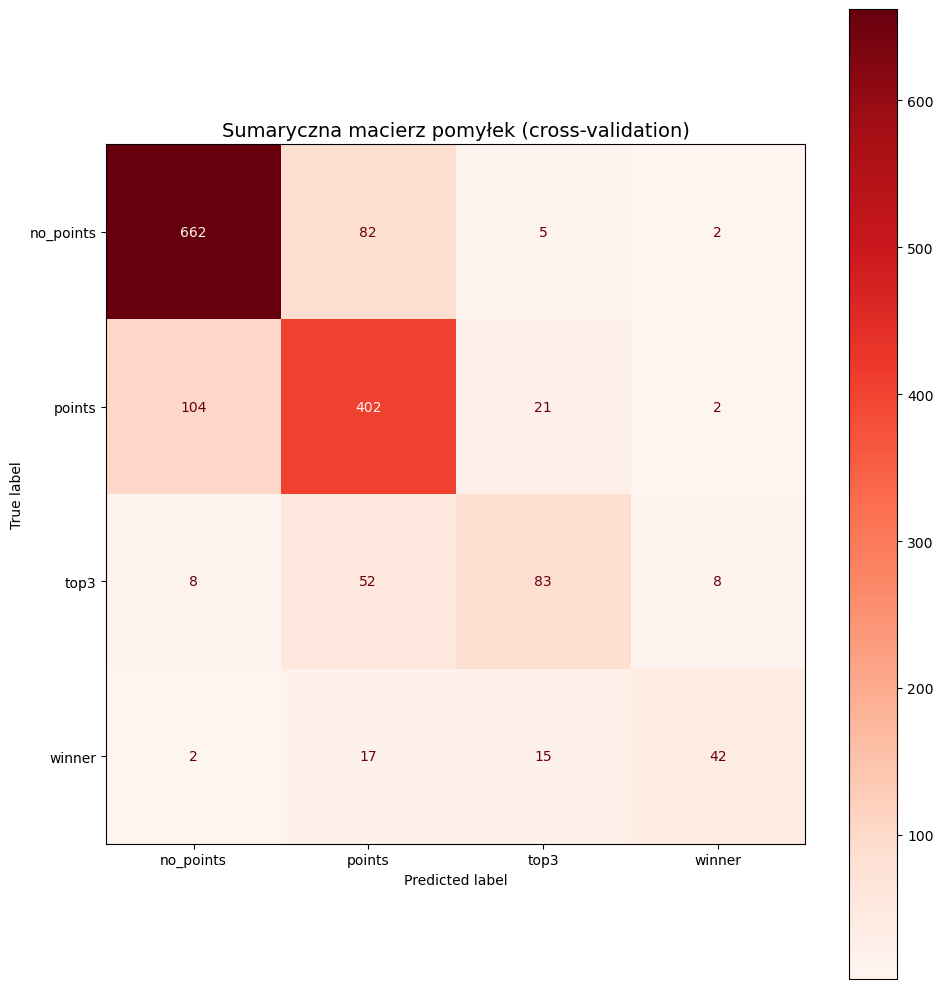

In [82]:
show_confusion_matrix(study)

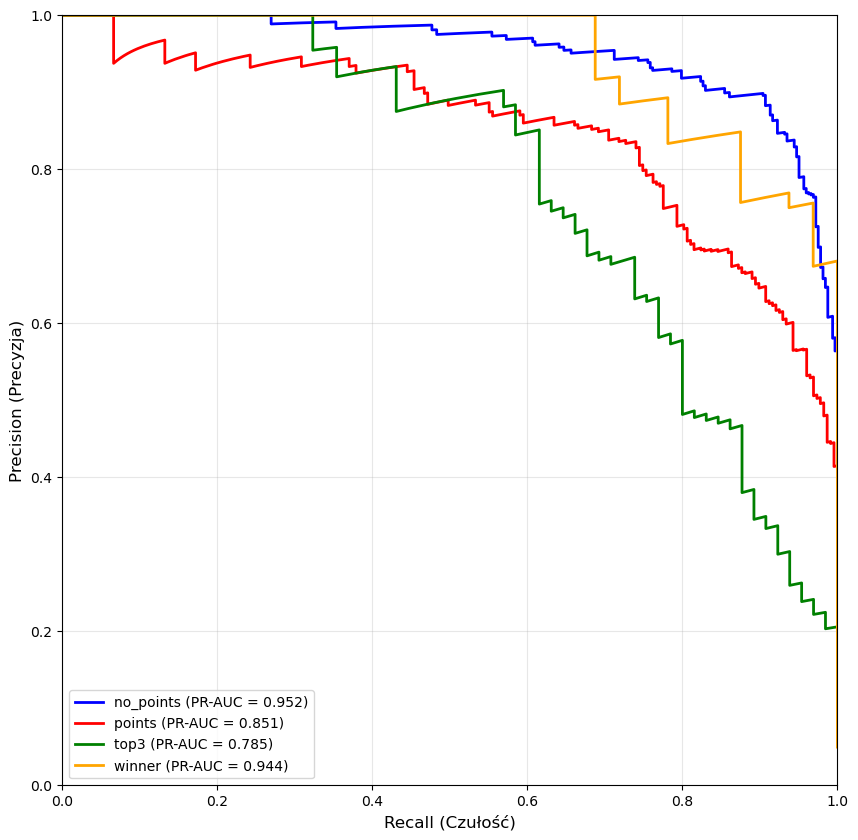

In [83]:
show_pr_auc_plot(study, X_train, y_train, X_valid, y_valid)

In [84]:
def show_feature_importance(study, X_train, y_train, feature_names):
    """Funkcja do wyświetlania ważności cech dla najlepszego modelu"""
    best_trial = study.best_trial
    best_params = best_trial.params
    
    # Tworzenie najlepszego modelu
    best_ensemble = get_best_ensemble(best_params)
    
    # Enkodowanie etykiet
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    
    # Trenowanie modelu
    best_ensemble.fit(X_train, y_train_enc)
    
    # Zbieranie ważności cech z każdego klasyfikatora
    rf_importance = best_ensemble.estimators_[0].feature_importances_  # Random Forest
    gb_importance = best_ensemble.estimators_[1].feature_importances_  # Gradient Boosting
    
    # SVM nie ma feature_importances_, więc pomijamy go lub używamy coefficients dla linear kernel
    
    # Średnia ważność z RF i GB
    avg_importance = (rf_importance + gb_importance) / 2
    
    # Tworzenie DataFrame dla lepszego wyświetlania
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Random_Forest': rf_importance,
        'Gradient_Boosting': gb_importance,
        'Average': avg_importance
    }).sort_values('Average', ascending=False)
    
    # Wykres 1: Średnia ważność cech
    plt.figure(figsize=(10, 10))
    top_features = importance_df.head(15)  # Top 15 cech
    plt.barh(range(len(top_features)), top_features['Average'], color='firebrick')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Średnia ważność cechy')
    #plt.title('Top 15 najważniejszych cech (średnia z Random Forest i Gradient Boosting)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Wykres 2: Random Forest
    plt.figure(figsize=(10, 10))
    rf_top = importance_df.head(15) # Top 15 cech
    plt.barh(range(len(rf_top)), rf_top['Random_Forest'], color='forestgreen')
    plt.yticks(range(len(rf_top)), rf_top['Feature'])
    plt.xlabel('Ważność cechy w modelu Random Forest')
    #plt.title('Top 15 cech - Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Wykres 3: Gradient Boosting
    plt.figure(figsize=(10, 10))
    gb_top = importance_df.head(15)
    plt.barh(range(len(gb_top)), gb_top['Gradient_Boosting'], color='darkorange')
    plt.yticks(range(len(gb_top)), gb_top['Feature'])
    plt.xlabel('Ważność cechy w modelu Gradient Boosting')
    #plt.title('Top 15 cech - Gradient Boosting')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Wykres 4: Porównanie top 10 cech
    plt.figure(figsize=(10, 10))
    top10 = importance_df.head(10)
    x = np.arange(len(top10))
    width = 0.35

    plt.bar(x - width/2, top10['Random_Forest'], width, label='Random Forest', color='forestgreen')
    plt.bar(x + width/2, top10['Gradient_Boosting'], width, label='Gradient Boosting', color='darkorange')

    plt.xlabel('Cechy')
    plt.ylabel('Ważność')
    #plt.title('Porównanie top 10 cech')
    plt.xticks(x, top10['Feature'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Wyświetlenie tabeli z ważnościami
    print("\n📈 Wszystkie cechy wraz z ich ważnościami:")
    print(importance_df.round(4))
    
    return importance_df

In [85]:
def show_feature_importance_selected(study, X_train, y_train, feature_names):
    """Funkcja do wyświetlania ważności cech dla najlepszego modelu z wyselekcjonowanymi cechami"""
    best_trial = study.best_trial
    best_params = best_trial.params
    
    # Tworzenie najlepszego modelu
    best_ensemble = get_best_ensemble(best_params)
    
    # Enkodowanie etykiet
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    
    # Trenowanie modelu
    best_ensemble.fit(X_train, y_train_enc)
    
    # Zbieranie ważności cech z każdego klasyfikatora
    rf_importance = best_ensemble.estimators_[0].feature_importances_  # Random Forest
    gb_importance = best_ensemble.estimators_[1].feature_importances_  # Gradient Boosting
    
    # SVM nie ma feature_importances_, więc pomijamy go lub używamy coefficients dla linear kernel
    
    # Średnia ważność z RF i GB
    avg_importance = (rf_importance + gb_importance) / 2
    
    # Tworzenie DataFrame dla lepszego wyświetlania
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Random_Forest': rf_importance,
        'Gradient_Boosting': gb_importance,
        'Average': avg_importance
    }).sort_values('Average', ascending=False)
    
    # Wykres 1: Średnia ważność cech
    plt.figure(figsize=(10, 10))
    top_features = importance_df.head(10)  # Top 10 cech
    plt.barh(range(len(top_features)), top_features['Average'], color='firebrick')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Średnia ważność cechy')
    #plt.title('Top 10 najważniejszych cech (średnia z Random Forest i Gradient Boosting)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Wykres 2: Random Forest
    plt.figure(figsize=(10, 10))
    rf_top = importance_df.head(10) # Top 10 cech
    plt.barh(range(len(rf_top)), rf_top['Random_Forest'], color='forestgreen')
    plt.yticks(range(len(rf_top)), rf_top['Feature'])
    plt.xlabel('Ważność cechy w modelu Random Forest')
    #plt.title('Top 10 cech - Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Wykres 3: Gradient Boosting
    plt.figure(figsize=(10, 10))
    gb_top = importance_df.head(10) # Top 10 cech
    plt.barh(range(len(gb_top)), gb_top['Gradient_Boosting'], color='darkorange')
    plt.yticks(range(len(gb_top)), gb_top['Feature'])
    plt.xlabel('Ważność cechy w modelu Gradient Boosting')
    #plt.title('Top 10 cech - Gradient Boosting')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Wykres 4: Porównanie top 10 cech
    plt.figure(figsize=(10, 10))
    top10 = importance_df.head(10)
    x = np.arange(len(top10))
    width = 0.35

    plt.bar(x - width/2, top10['Random_Forest'], width, label='Random Forest', color='forestgreen')
    plt.bar(x + width/2, top10['Gradient_Boosting'], width, label='Gradient Boosting', color='darkorange')
    
    plt.xlabel('Cechy')
    plt.ylabel('Ważność')
    #plt.title('Porównanie top 10 cech')
    plt.xticks(x, top10['Feature'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Wyświetlenie tabeli z ważnościami
    print("\n📈 Cechy wraz z ich waznosciami:")
    print(importance_df.round(4))
    
    return importance_df

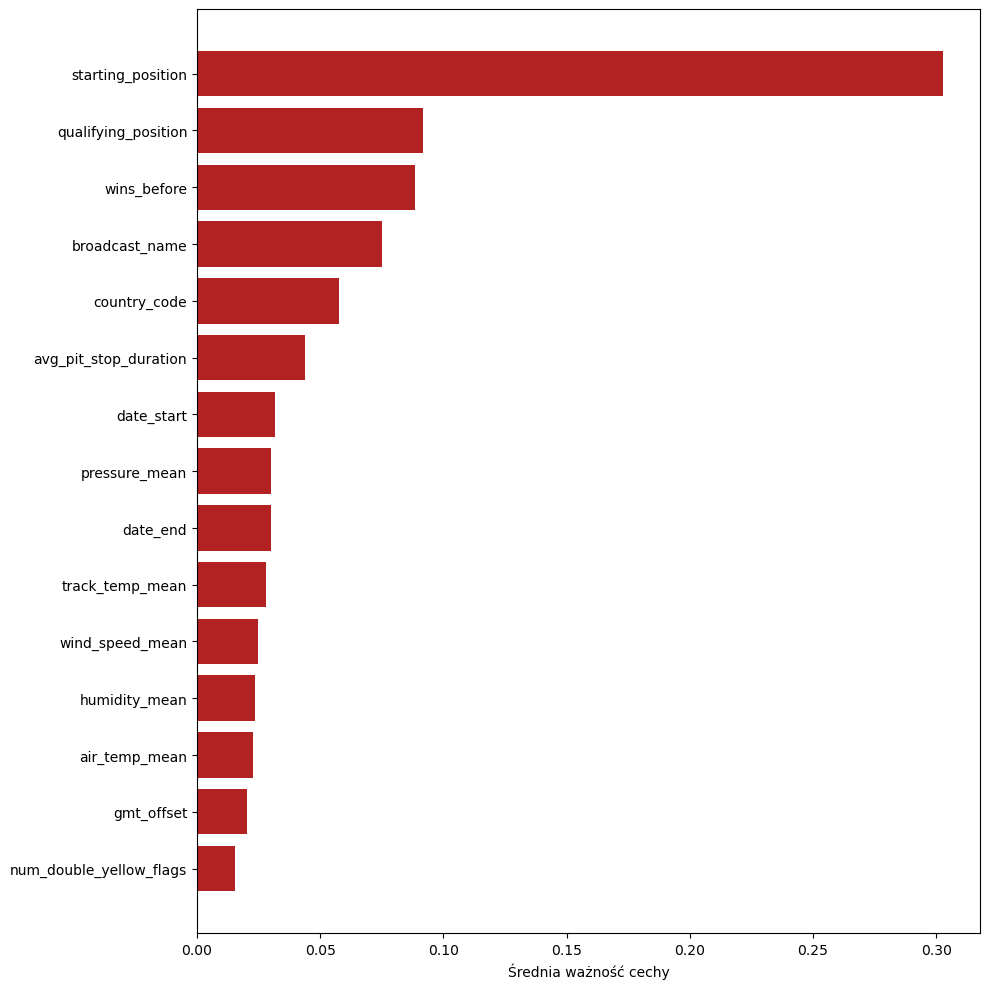

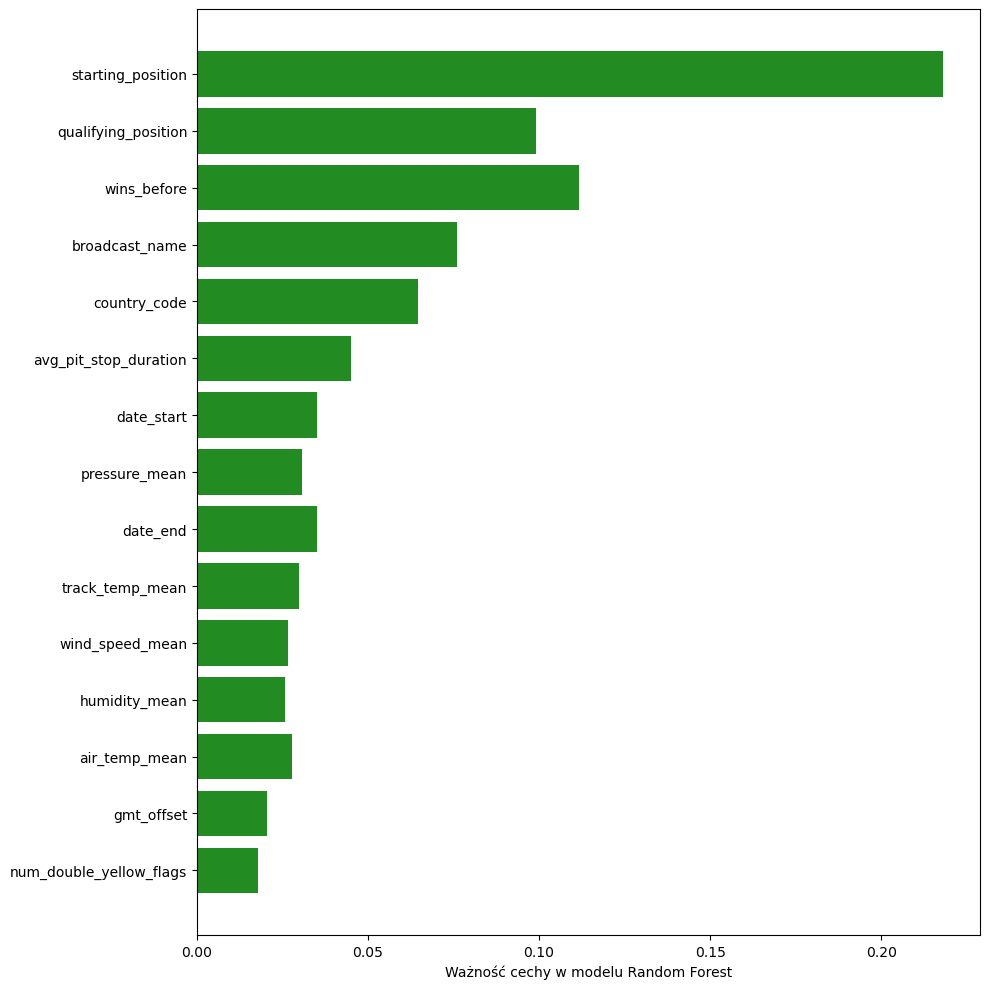

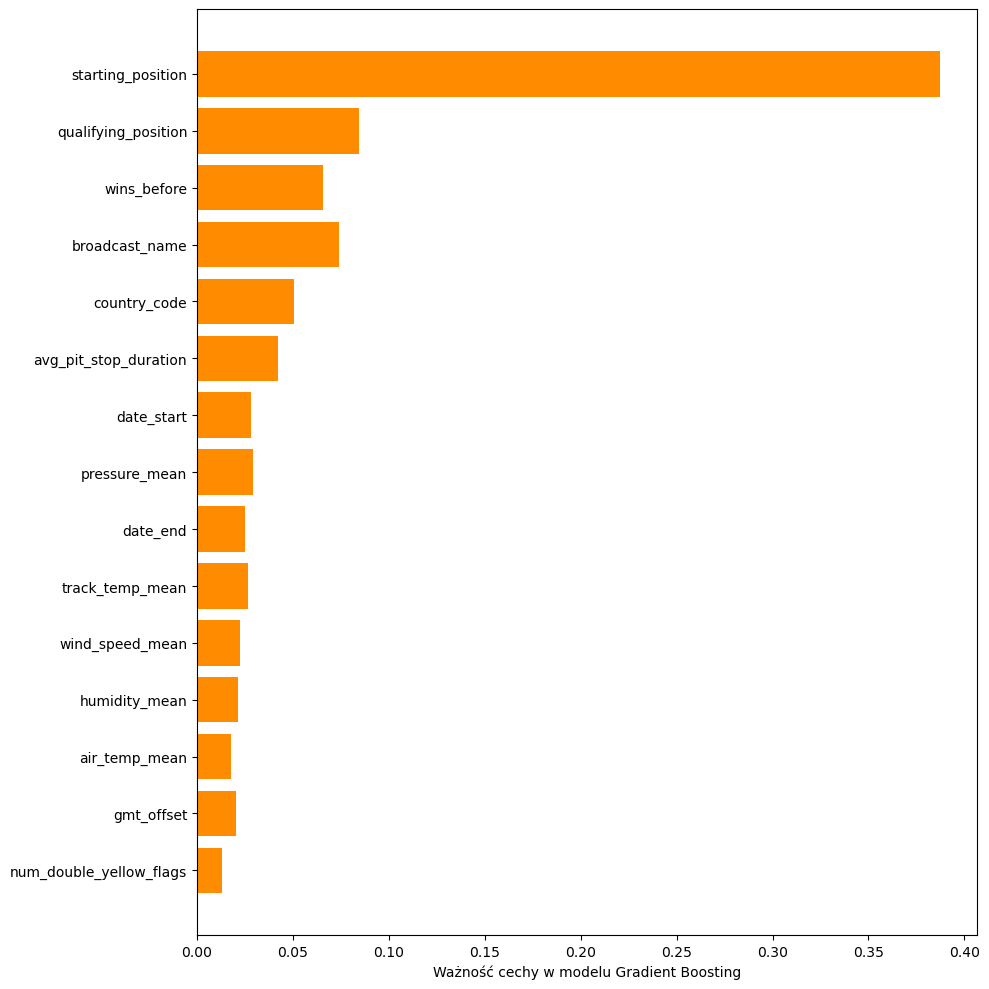

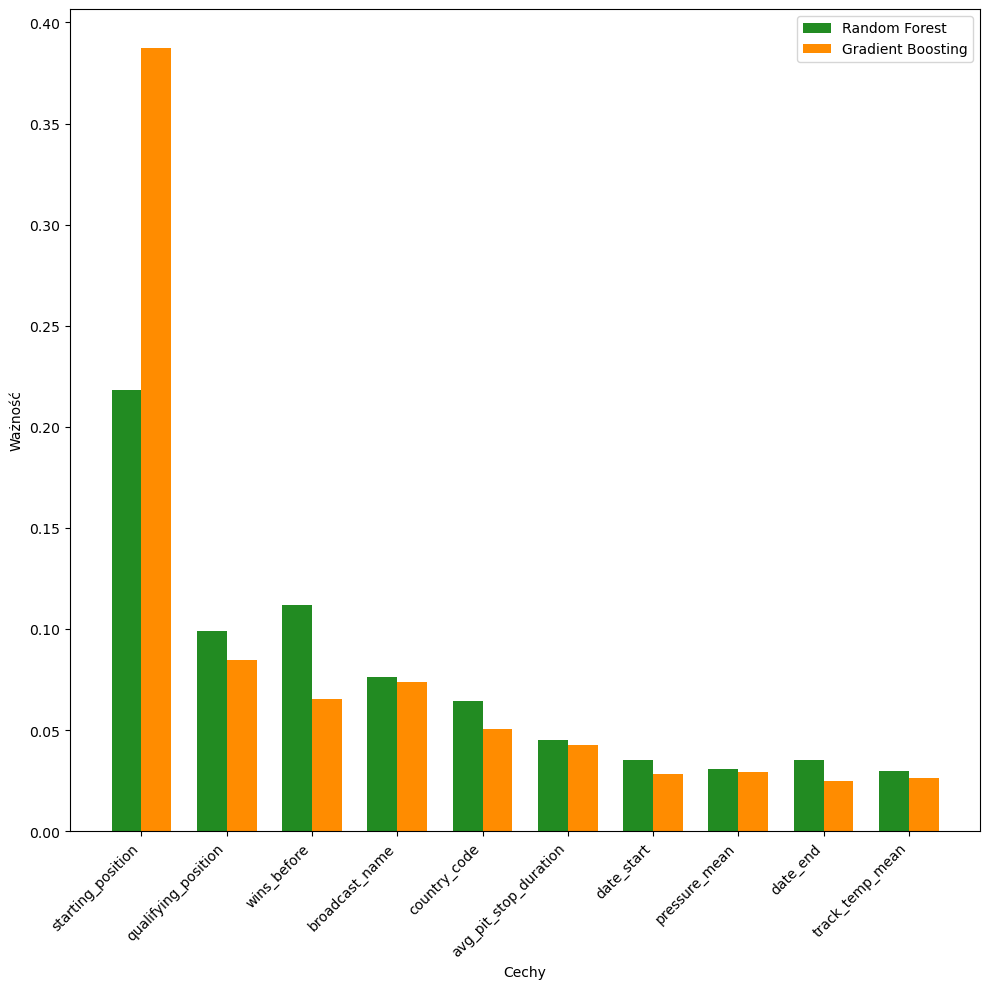


📈 Wszystkie cechy wraz z ich ważnościami:
                    Feature  Random_Forest  Gradient_Boosting  Average
9         starting_position         0.2180             0.3873   0.3026
13      qualifying_position         0.0992             0.0845   0.0918
10              wins_before         0.1116             0.0655   0.0886
0            broadcast_name         0.0761             0.0739   0.0750
1              country_code         0.0646             0.0505   0.0575
12    avg_pit_stop_duration         0.0449             0.0425   0.0437
4                date_start         0.0352             0.0282   0.0317
26            pressure_mean         0.0306             0.0293   0.0299
6                  date_end         0.0350             0.0248   0.0299
24          track_temp_mean         0.0299             0.0265   0.0282
28          wind_speed_mean         0.0267             0.0226   0.0246
25            humidity_mean         0.0256             0.0212   0.0234
23            air_temp_mean       

In [86]:
feature_importance_df = show_feature_importance(study, X_train, y_train, X_train.columns.tolist())

### DODATKOWY MODEL BAZUJACY NA SEKEKCJI CECH

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

required_features = ['broadcast_name', 'session_name']
other_features = [col for col in X_train.columns if col not in required_features]
selector = SelectKBest(score_func=f_classif, k=8)
X_train_sel = selector.fit_transform(X_train[other_features], y_train)
selected_other = [other_features[i] for i, sel in enumerate(selector.get_support()) if sel]
final_features = required_features + selected_other
X_train_selected = X_train[final_features]
X_valid_selected = X_valid[final_features]

In [88]:
print("Wybrane cechy:", final_features)

Wybrane cechy: ['broadcast_name', 'session_name', 'country_code', 'starting_position', 'wins_before', 'qualifying_position', 'used_soft', 'used_medium', 'used_hard', 'penalty_seconds']


In [89]:
# run the optimization
study_selected = optuna.create_study(direction="maximize")
#trials = 50, kfolds = 5
study_selected.optimize(lambda trial: objective(trial, kfolds=5, X_train=X_train_selected, y_train=y_train, X_valid=X_valid_selected, y_valid=y_valid), n_trials=50)

[I 2025-10-03 22:53:40,729] A new study created in memory with name: no-name-f3d9031c-9d89-4a97-ae4f-145aa3ab3141
[I 2025-10-03 22:53:53,596] Trial 0 finished with value: 0.7982794657983322 and parameters: {'rf_n_estimators': 88, 'rf_max_depth': 11, 'gb_n_estimators': 58, 'gb_learning_rate': 0.10685094111790079, 'gb_max_depth': 7, 'svm_C': 5.721375981476692, 'svm_kernel': 'rbf'}. Best is trial 0 with value: 0.7982794657983322.
[I 2025-10-03 22:54:00,114] Trial 1 finished with value: 0.7458537765945744 and parameters: {'rf_n_estimators': 102, 'rf_max_depth': 14, 'gb_n_estimators': 88, 'gb_learning_rate': 0.13020220467830845, 'gb_max_depth': 2, 'svm_C': 2.837624626884127, 'svm_kernel': 'rbf'}. Best is trial 0 with value: 0.7982794657983322.
[I 2025-10-03 22:54:06,418] Trial 2 finished with value: 0.7312578381113727 and parameters: {'rf_n_estimators': 102, 'rf_max_depth': 10, 'gb_n_estimators': 66, 'gb_learning_rate': 0.2442243060486543, 'gb_max_depth': 2, 'svm_C': 4.310171340454538, 'svm

In [90]:
show_best_parameters_and_metrics(study_selected)

🎯 Najlepsze hiperparametry:
rf_n_estimators: 117
rf_max_depth: 12
gb_n_estimators: 140
gb_learning_rate: 0.16500077452180248
gb_max_depth: 6
svm_C: 2.548676383286408
svm_kernel: rbf

📊 Metryki najlepszej próby:
F1-score (macro): 0.7460 ± 0.0083
Precision (macro): 0.7750 ± 0.0229
Recall / Sensitivity (macro): 0.7283 ± 0.0140
Specificity (avg): 0.9226 ± 0.0064
Accuracy: 0.8069 ± 0.0144
PR-AUC (macro): 0.7801 ± 0.0221
PR-AUC (weighted): 0.8454 ± 0.0150

🧮 Confusion Matrix:
[[660  81   8   2]
 [ 89 413  24   3]
 [  8  37  96  10]
 [  2  14  13  47]]


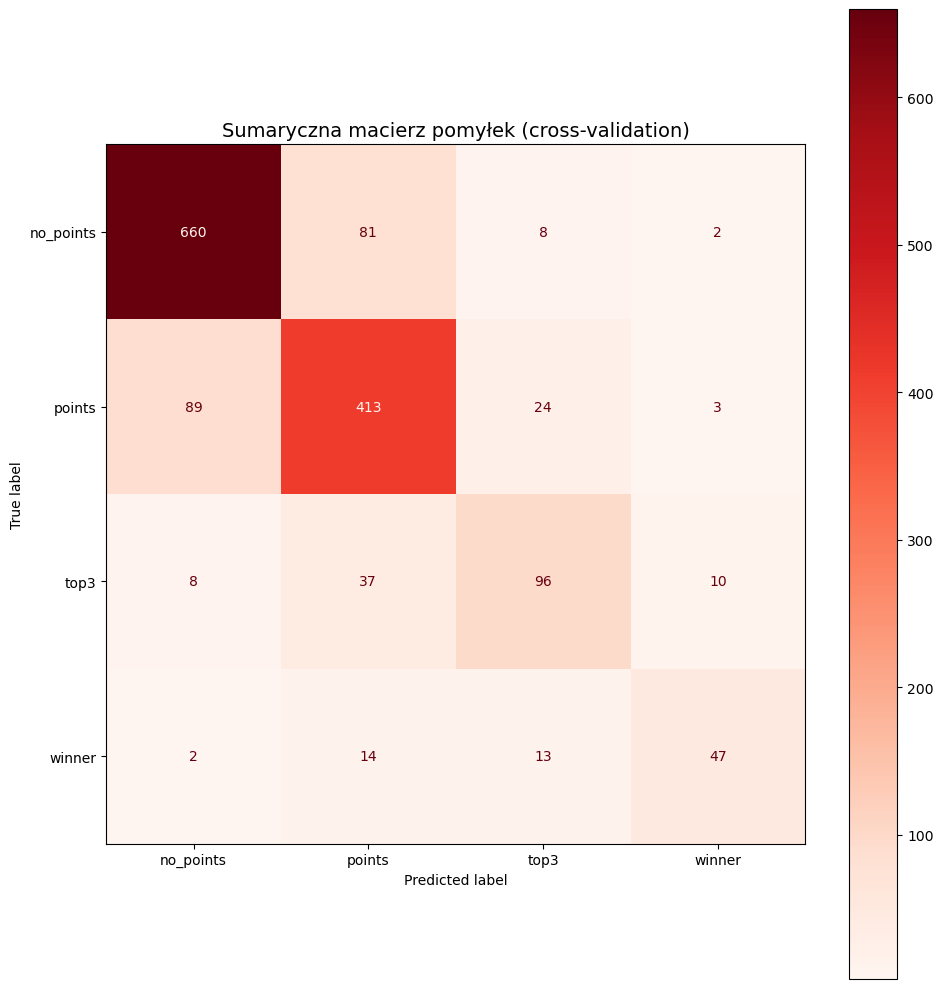

In [91]:
show_confusion_matrix(study_selected)

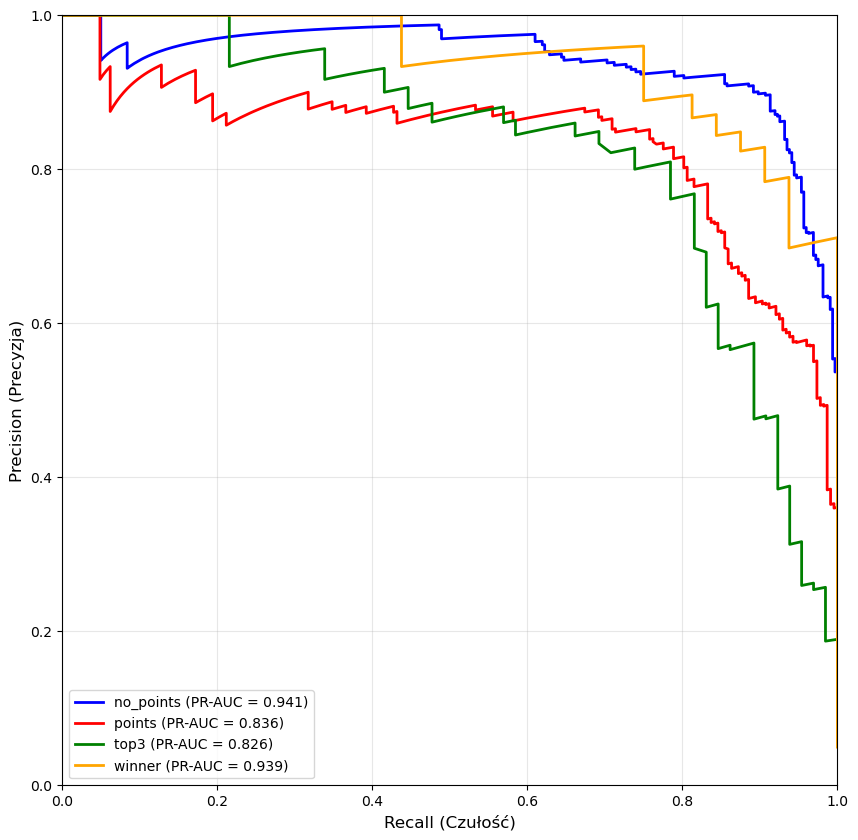

In [92]:
show_pr_auc_plot(study_selected, X_train_selected, y_train, X_valid_selected, y_valid)

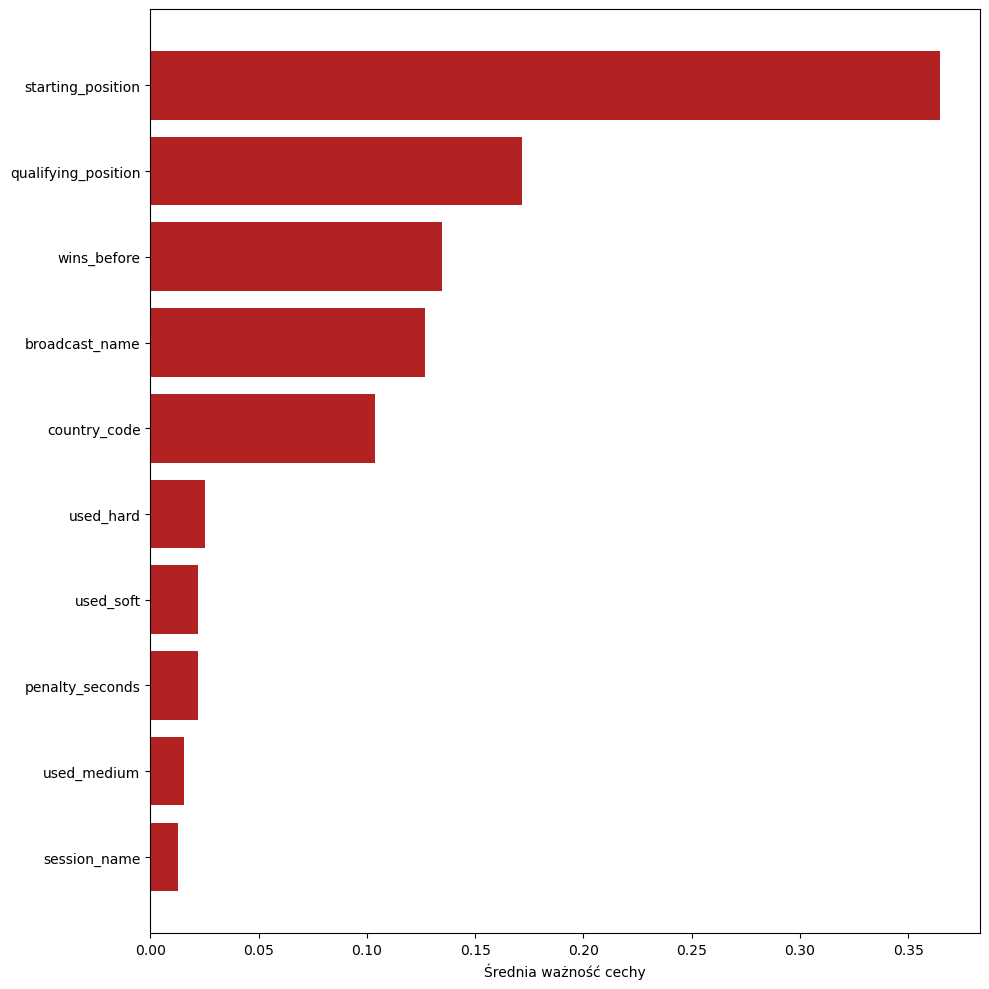

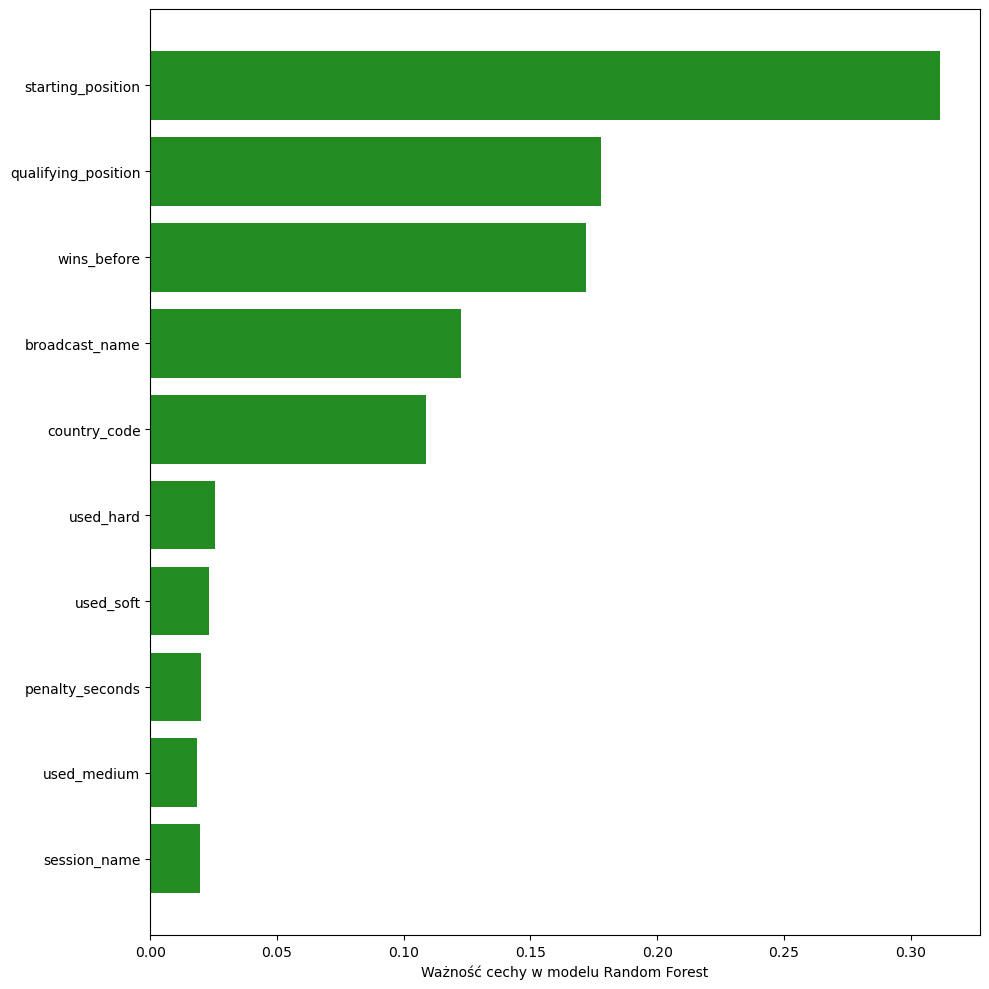

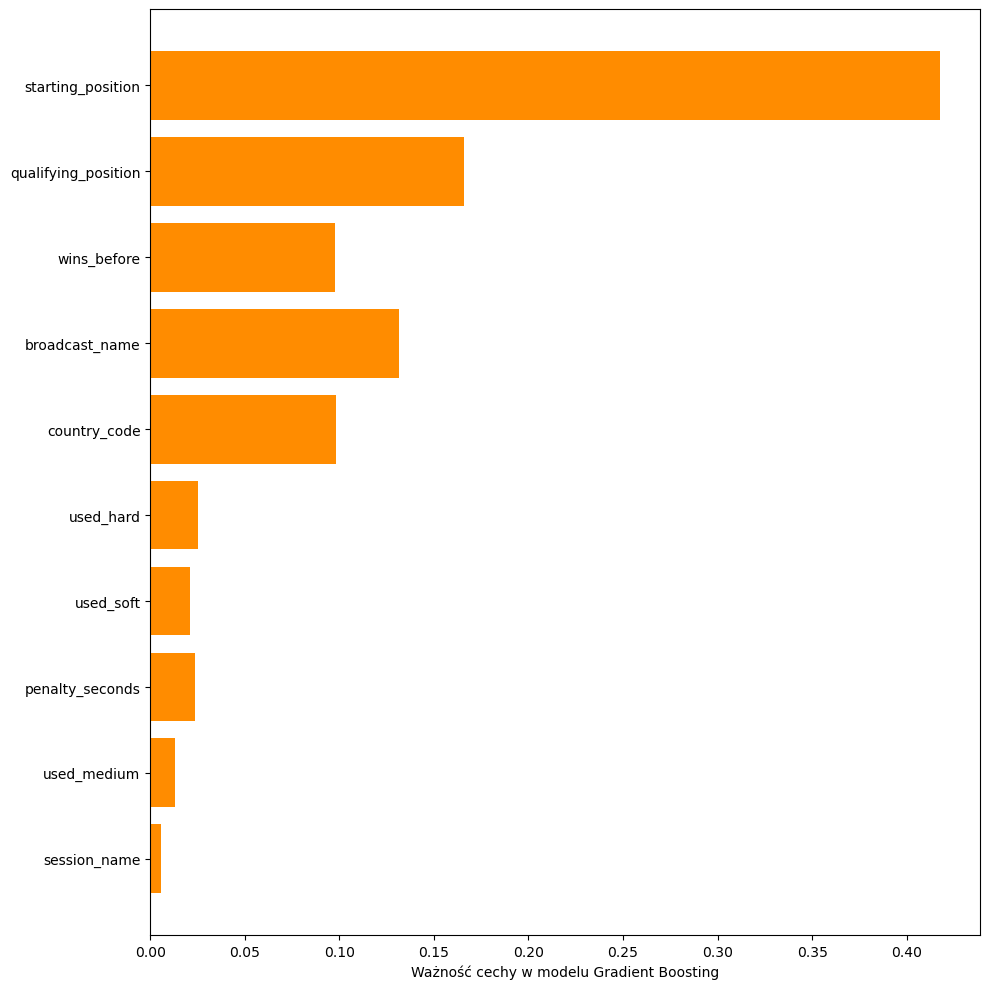

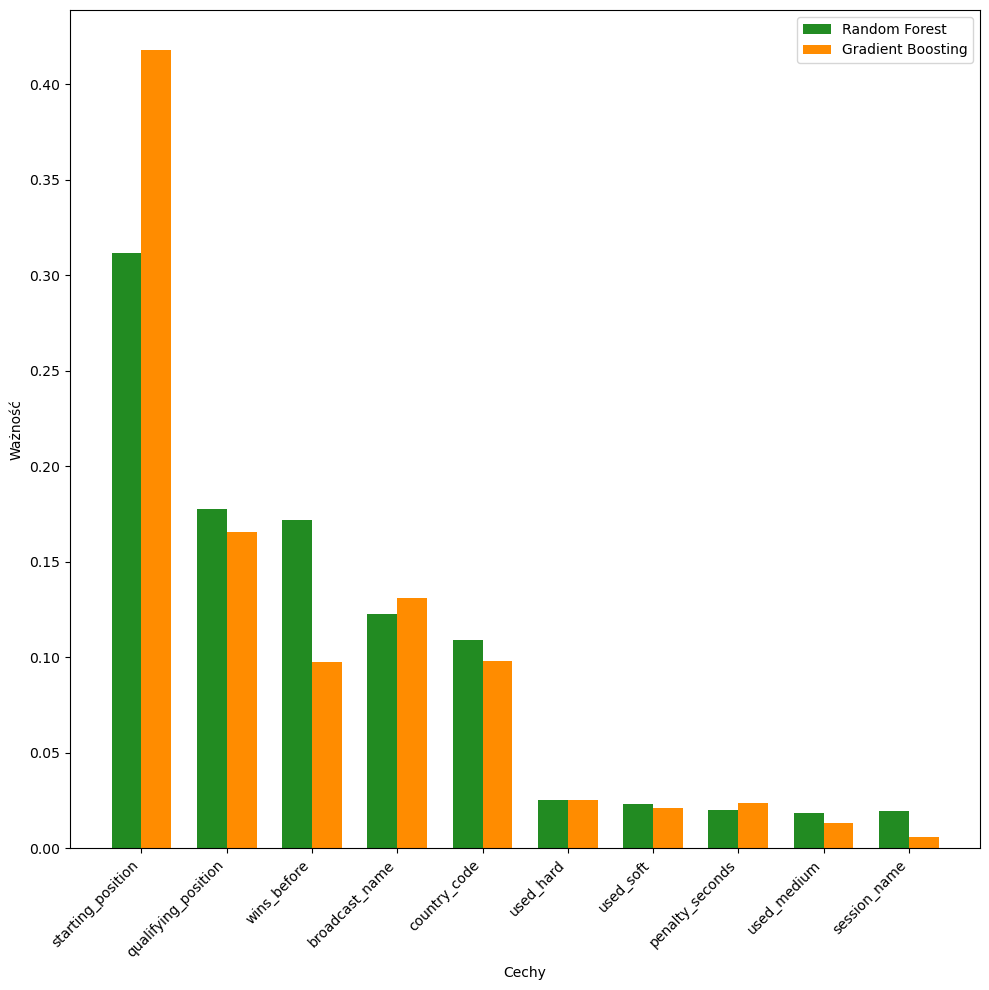


📈 Wszystkie cechy wraz z ich ważnościami:
               Feature  Random_Forest  Gradient_Boosting  Average
3    starting_position         0.3117             0.4179   0.3648
5  qualifying_position         0.1778             0.1658   0.1718
4          wins_before         0.1720             0.0975   0.1347
0       broadcast_name         0.1226             0.1313   0.1269
2         country_code         0.1089             0.0982   0.1036
8            used_hard         0.0254             0.0253   0.0254
6            used_soft         0.0234             0.0210   0.0222
9      penalty_seconds         0.0201             0.0238   0.0220
7          used_medium         0.0183             0.0132   0.0158
1         session_name         0.0198             0.0060   0.0129


In [93]:
feature_importance_selected_df = show_feature_importance(study_selected, X_train_selected, y_train, X_train_selected.columns.tolist())

### RUN OPTUNA FOR 100 ITERATIONS

##### ALL EFATURES

In [94]:
# run the optimization
study_100 = optuna.create_study(direction="maximize")
#trials = 50, kfolds = 5
study_100.optimize(lambda trial: objective(trial, kfolds=5, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid), n_trials=100)

[I 2025-10-03 23:17:33,228] A new study created in memory with name: no-name-1b4f01b8-f6e9-49d3-b207-ab72f28a518d
[I 2025-10-03 23:18:19,805] Trial 0 finished with value: 0.7723878462520076 and parameters: {'rf_n_estimators': 106, 'rf_max_depth': 4, 'gb_n_estimators': 72, 'gb_learning_rate': 0.20737796605941472, 'gb_max_depth': 7, 'svm_C': 0.501372085496132, 'svm_kernel': 'rbf'}. Best is trial 0 with value: 0.7723878462520076.
[I 2025-10-03 23:18:33,676] Trial 1 finished with value: 0.7239312666387978 and parameters: {'rf_n_estimators': 79, 'rf_max_depth': 12, 'gb_n_estimators': 56, 'gb_learning_rate': 0.2478135674082167, 'gb_max_depth': 2, 'svm_C': 0.17247198824721233, 'svm_kernel': 'linear'}. Best is trial 0 with value: 0.7723878462520076.
[I 2025-10-03 23:19:01,755] Trial 2 finished with value: 0.7259400233218191 and parameters: {'rf_n_estimators': 123, 'rf_max_depth': 7, 'gb_n_estimators': 100, 'gb_learning_rate': 0.055793127995123044, 'gb_max_depth': 3, 'svm_C': 5.435280126333495,

In [95]:
show_best_parameters_and_metrics(study_100)

🎯 Najlepsze hiperparametry:
rf_n_estimators: 116
rf_max_depth: 13
gb_n_estimators: 107
gb_learning_rate: 0.13565806596927335
gb_max_depth: 7
svm_C: 4.032063258557516
svm_kernel: linear

📊 Metryki najlepszej próby:
F1-score (macro): 0.7113 ± 0.0371
Precision (macro): 0.7498 ± 0.0360
Recall / Sensitivity (macro): 0.6876 ± 0.0405
Specificity (avg): 0.9166 ± 0.0110
Accuracy: 0.7923 ± 0.0272
PR-AUC (macro): 0.7733 ± 0.0284
PR-AUC (weighted): 0.8439 ± 0.0210

🧮 Confusion Matrix:
[[658  83   8   2]
 [ 94 412  18   5]
 [  6  54  82   9]
 [  2  16  16  42]]


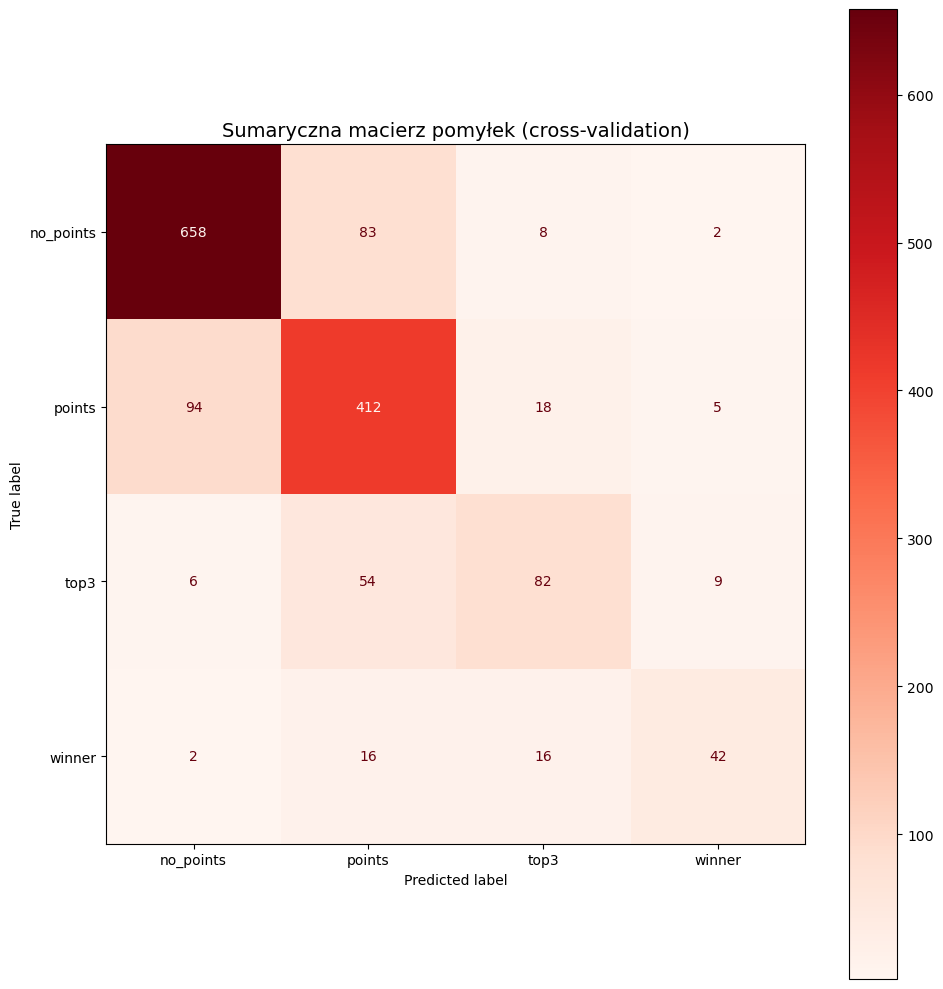

In [96]:
show_confusion_matrix(study_100)

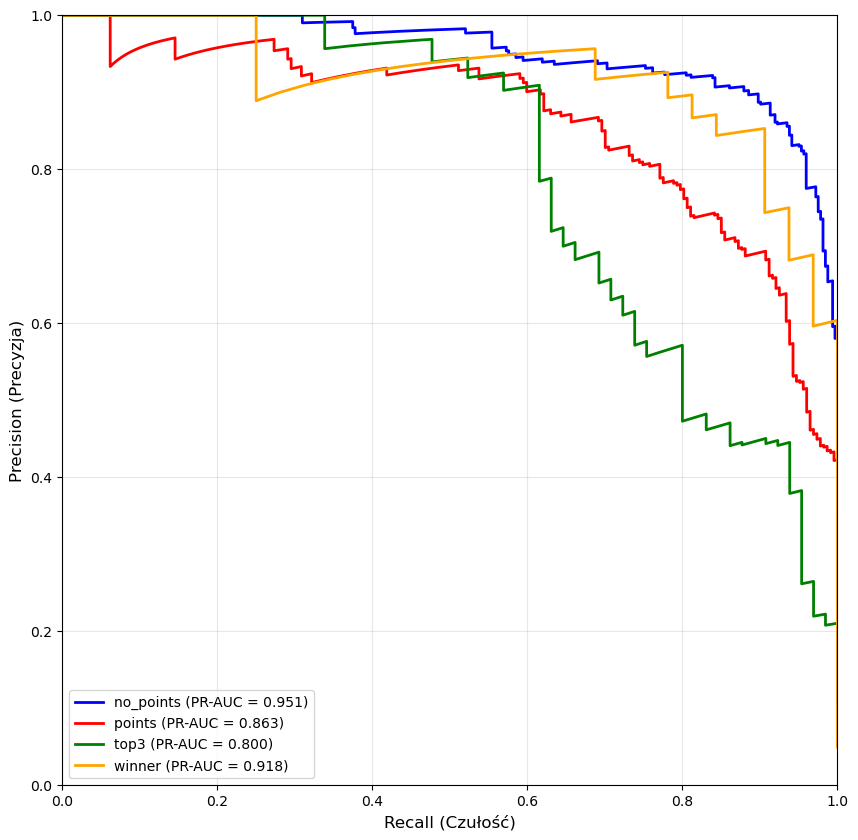

In [97]:
show_pr_auc_plot(study_100, X_train, y_train, X_valid, y_valid)

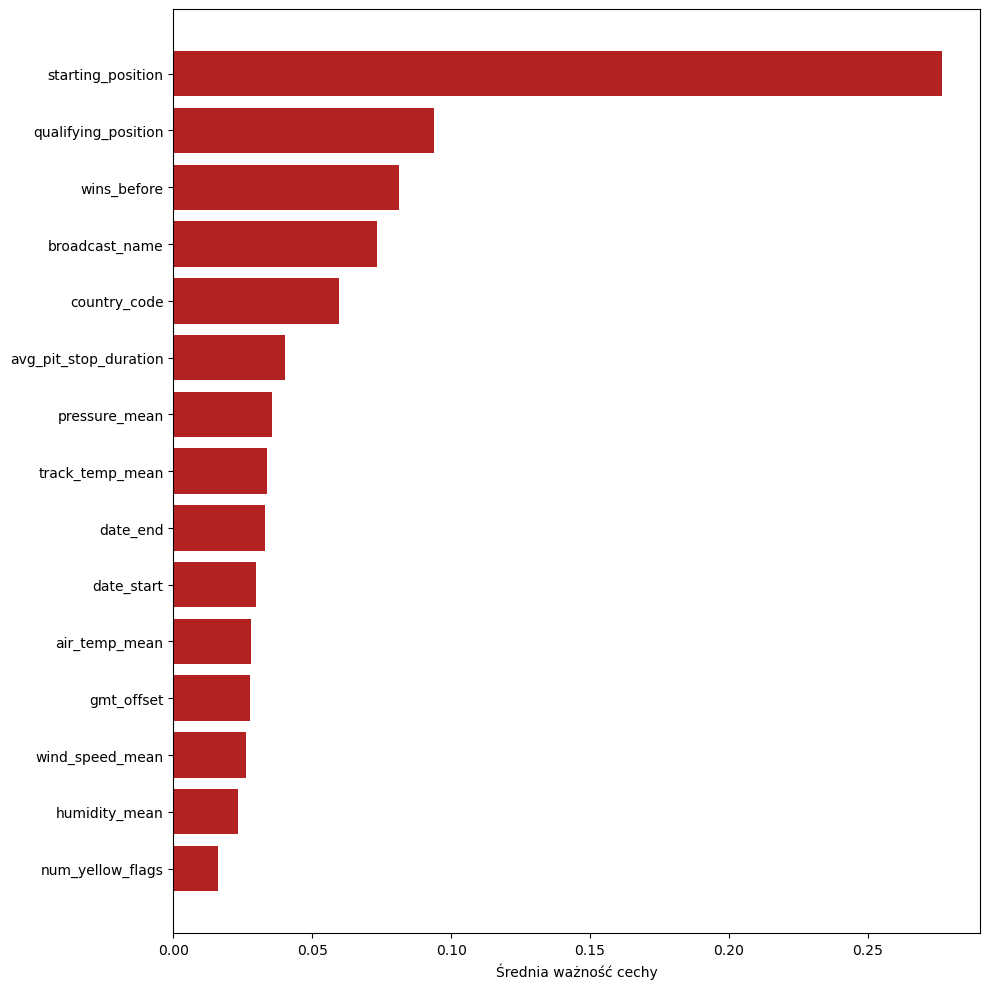

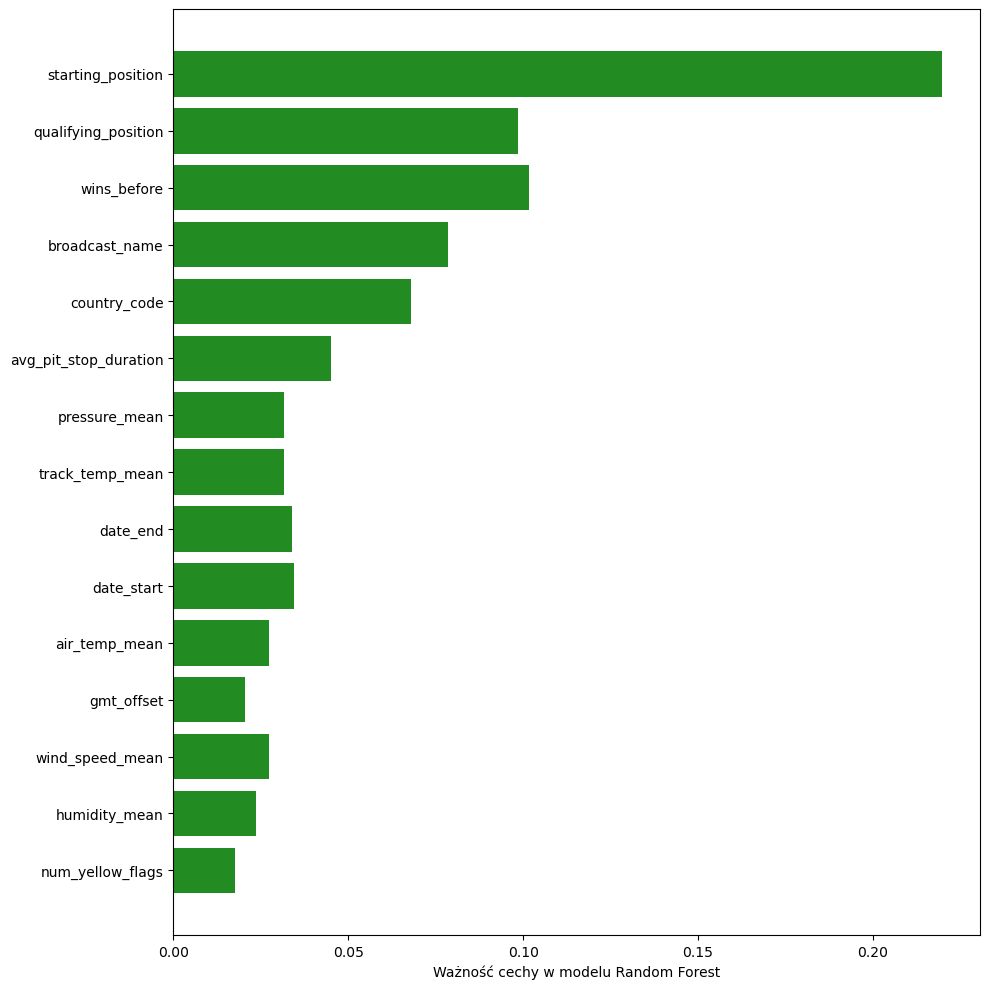

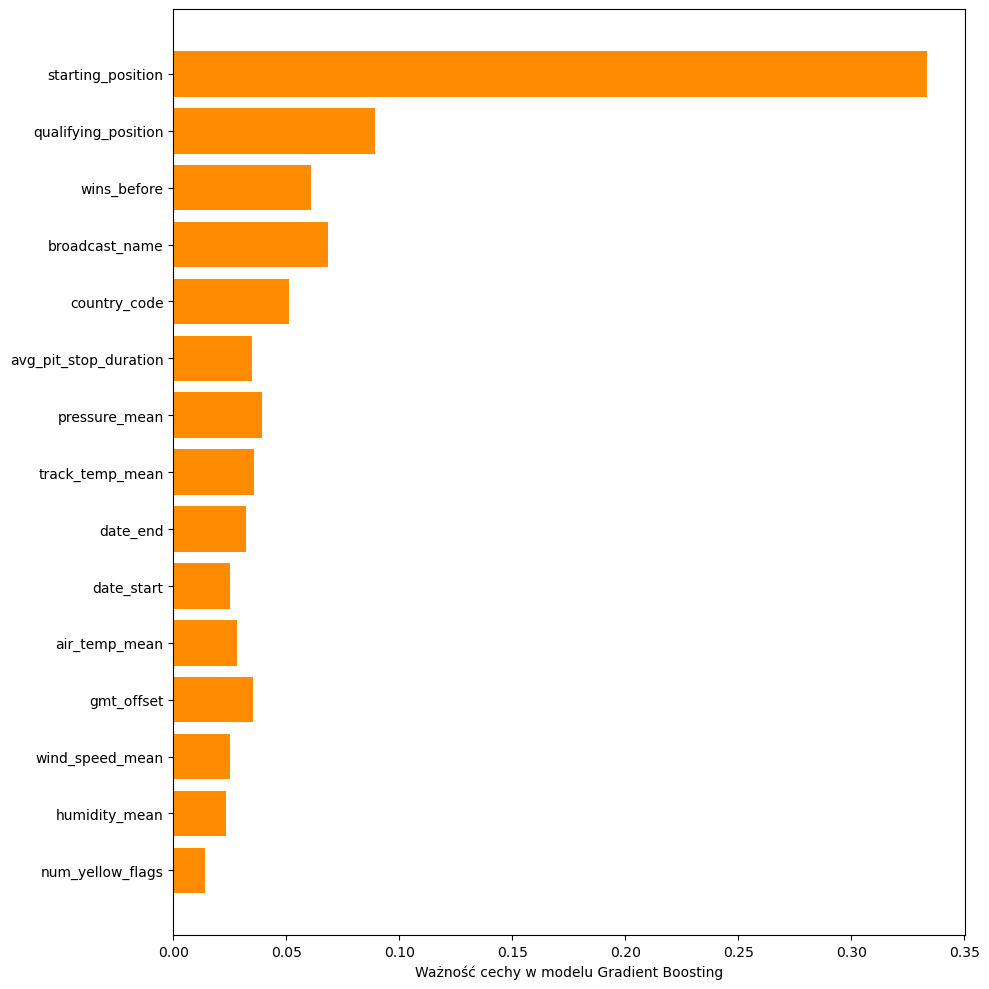

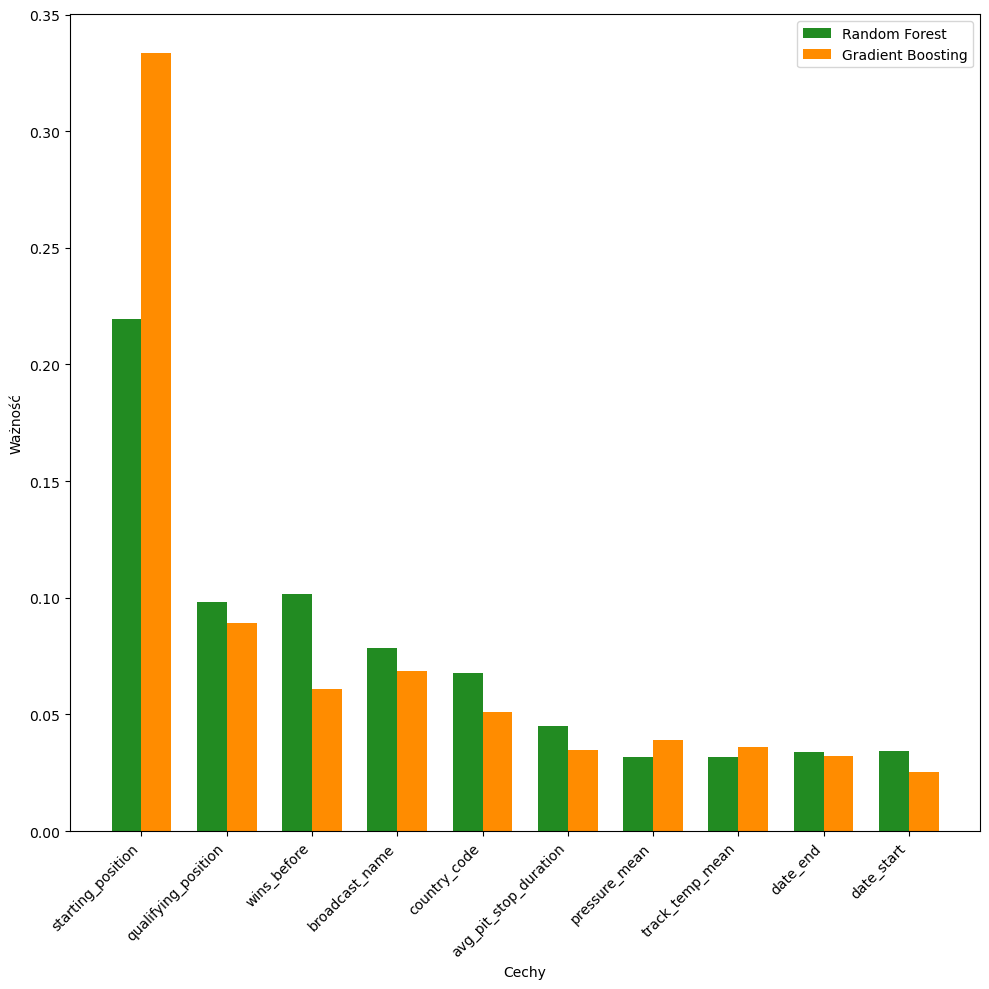


📈 Wszystkie cechy wraz z ich ważnościami:
                    Feature  Random_Forest  Gradient_Boosting  Average
9         starting_position         0.2196             0.3334   0.2765
13      qualifying_position         0.0984             0.0894   0.0939
10              wins_before         0.1018             0.0609   0.0814
0            broadcast_name         0.0784             0.0684   0.0734
1              country_code         0.0679             0.0512   0.0595
12    avg_pit_stop_duration         0.0452             0.0349   0.0400
26            pressure_mean         0.0316             0.0391   0.0353
24          track_temp_mean         0.0317             0.0359   0.0338
6                  date_end         0.0340             0.0321   0.0331
4                date_start         0.0345             0.0252   0.0299
23            air_temp_mean         0.0275             0.0282   0.0279
8                gmt_offset         0.0203             0.0352   0.0278
28          wind_speed_mean       

In [98]:
feature_importance_100_f = show_feature_importance(study_100, X_train, y_train, X_train.columns.tolist())

##### FEATURE SELECTION

In [99]:
# run the optimization
study_selected_100 = optuna.create_study(direction="maximize")
#trials = 50, kfolds = 5
study_selected_100.optimize(lambda trial: objective(trial, kfolds=5, X_train=X_train_selected, y_train=y_train, X_valid=X_valid_selected, y_valid=y_valid), n_trials=100)

[I 2025-10-04 00:53:01,133] A new study created in memory with name: no-name-cf67482e-62c0-4e6d-b1fc-6d0f03eebc3e
[I 2025-10-04 00:53:16,705] Trial 0 finished with value: 0.7617940199335548 and parameters: {'rf_n_estimators': 101, 'rf_max_depth': 8, 'gb_n_estimators': 138, 'gb_learning_rate': 0.06451170356187663, 'gb_max_depth': 5, 'svm_C': 0.15569219072286883, 'svm_kernel': 'rbf'}. Best is trial 0 with value: 0.7617940199335548.
[I 2025-10-04 00:53:34,439] Trial 1 finished with value: 0.7929660513520055 and parameters: {'rf_n_estimators': 103, 'rf_max_depth': 5, 'gb_n_estimators': 134, 'gb_learning_rate': 0.280338816016389, 'gb_max_depth': 6, 'svm_C': 0.3120896966719631, 'svm_kernel': 'linear'}. Best is trial 1 with value: 0.7929660513520055.
[I 2025-10-04 00:54:07,913] Trial 2 finished with value: 0.8009174715627818 and parameters: {'rf_n_estimators': 80, 'rf_max_depth': 7, 'gb_n_estimators': 128, 'gb_learning_rate': 0.08864110772585991, 'gb_max_depth': 8, 'svm_C': 0.3553413128198388

In [100]:
show_best_parameters_and_metrics(study_selected_100)

🎯 Najlepsze hiperparametry:
rf_n_estimators: 131
rf_max_depth: 12
gb_n_estimators: 58
gb_learning_rate: 0.17995682353550985
gb_max_depth: 7
svm_C: 0.357786164184219
svm_kernel: rbf

📊 Metryki najlepszej próby:
F1-score (macro): 0.7395 ± 0.0136
Precision (macro): 0.7740 ± 0.0313
Recall / Sensitivity (macro): 0.7226 ± 0.0280
Specificity (avg): 0.9234 ± 0.0070
Accuracy: 0.8082 ± 0.0132
PR-AUC (macro): 0.7761 ± 0.0265
PR-AUC (weighted): 0.8420 ± 0.0166

🧮 Confusion Matrix:
[[665  78   6   2]
 [ 88 412  24   5]
 [  7  38  96  10]
 [  1  16  14  45]]


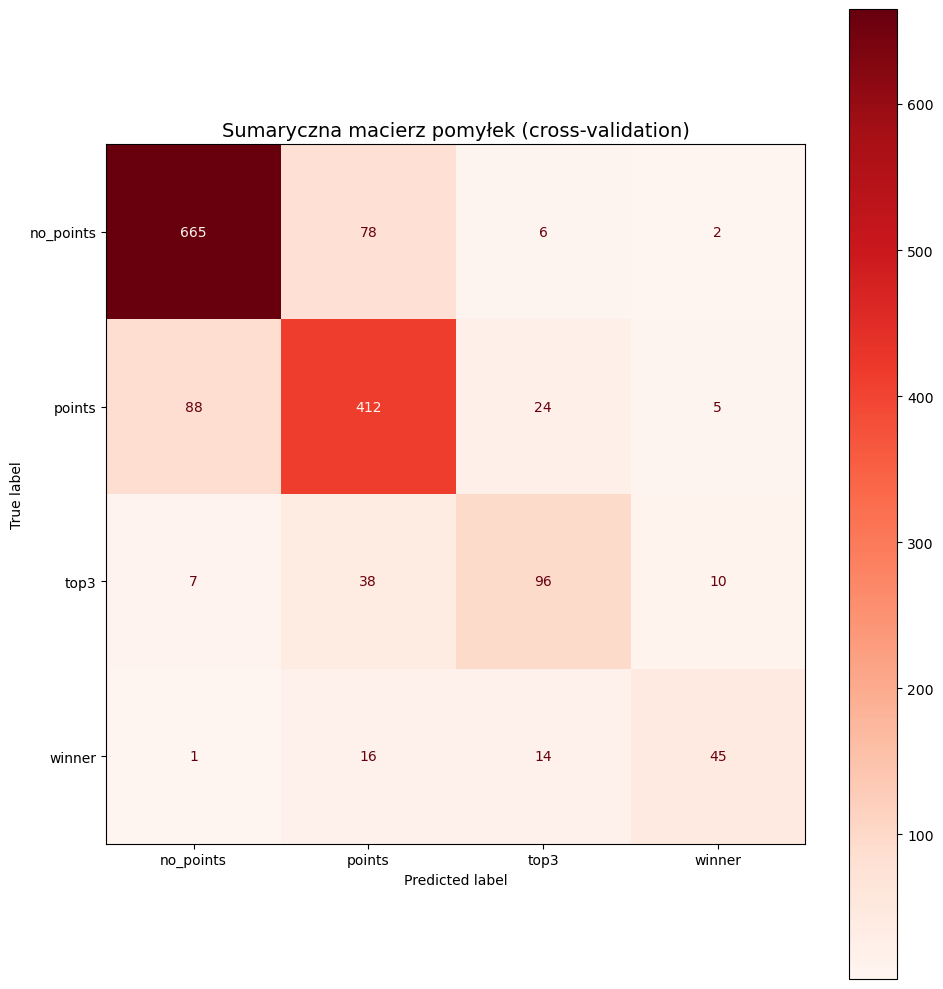

In [101]:
show_confusion_matrix(study_selected_100)

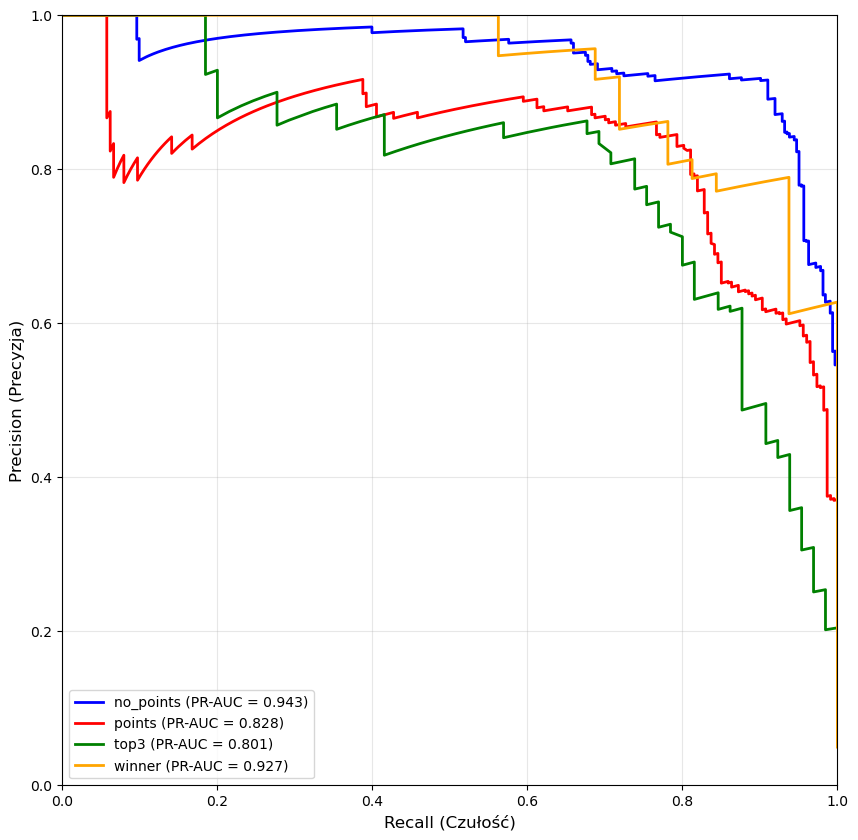

In [102]:
show_pr_auc_plot(study_selected_100, X_train_selected, y_train, X_valid_selected, y_valid)

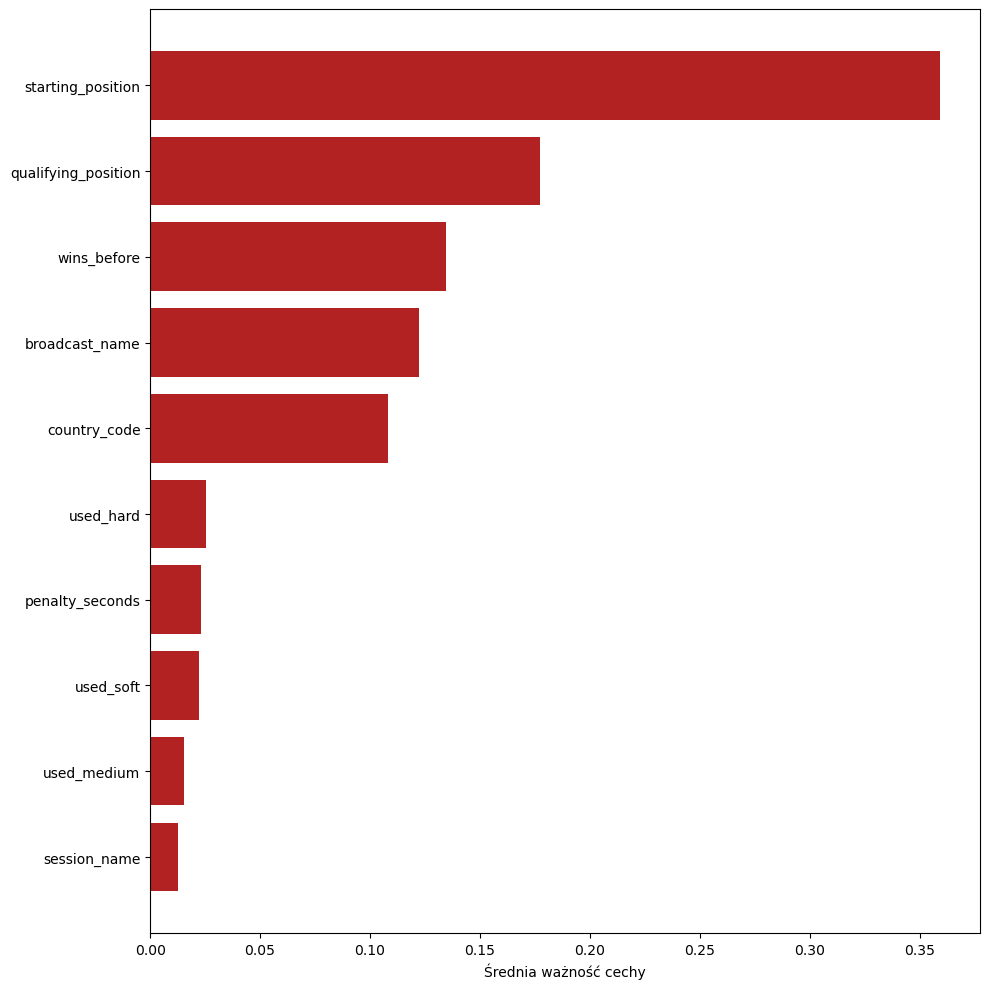

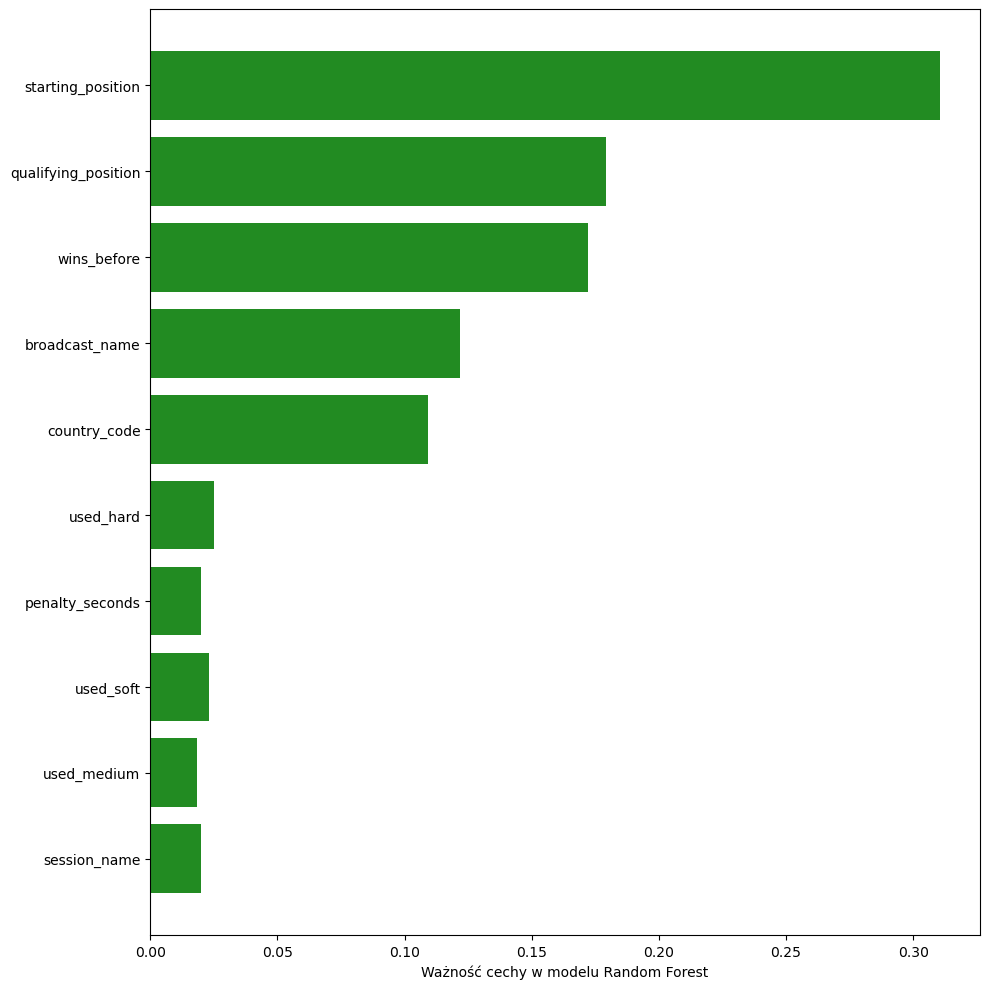

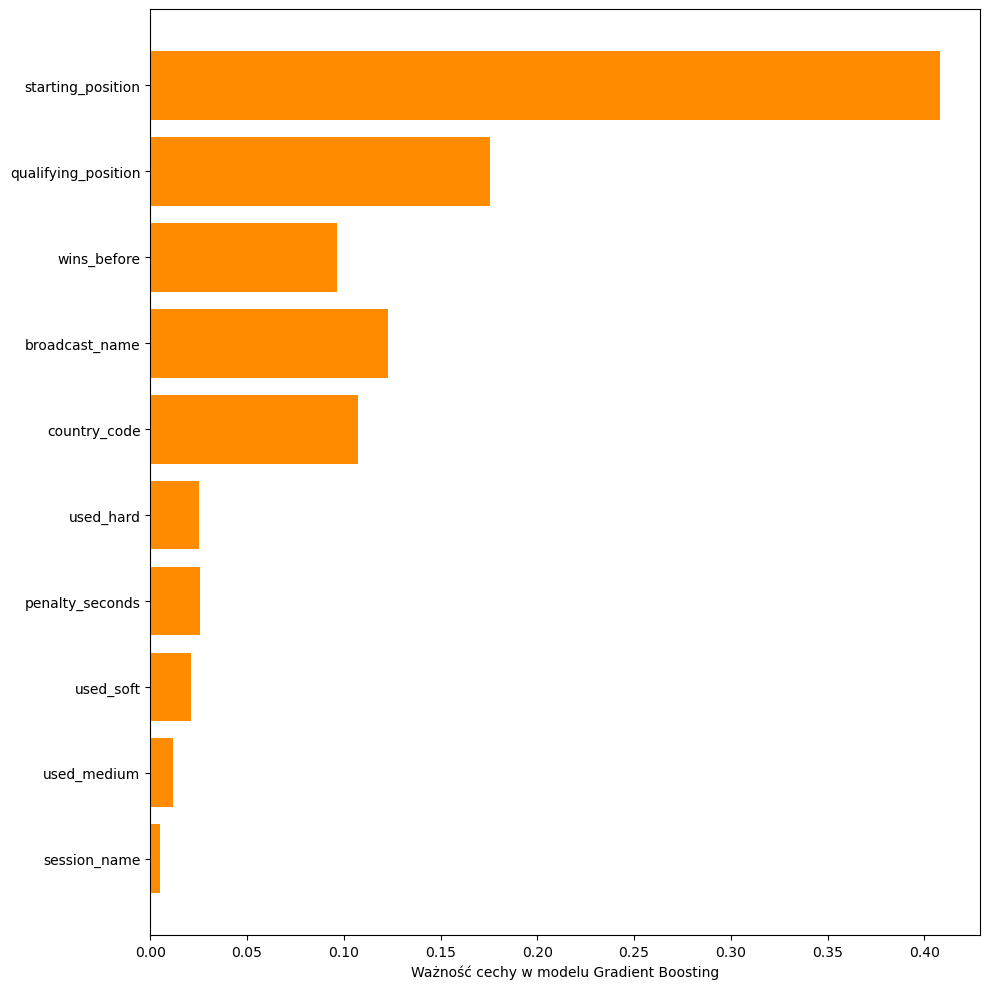

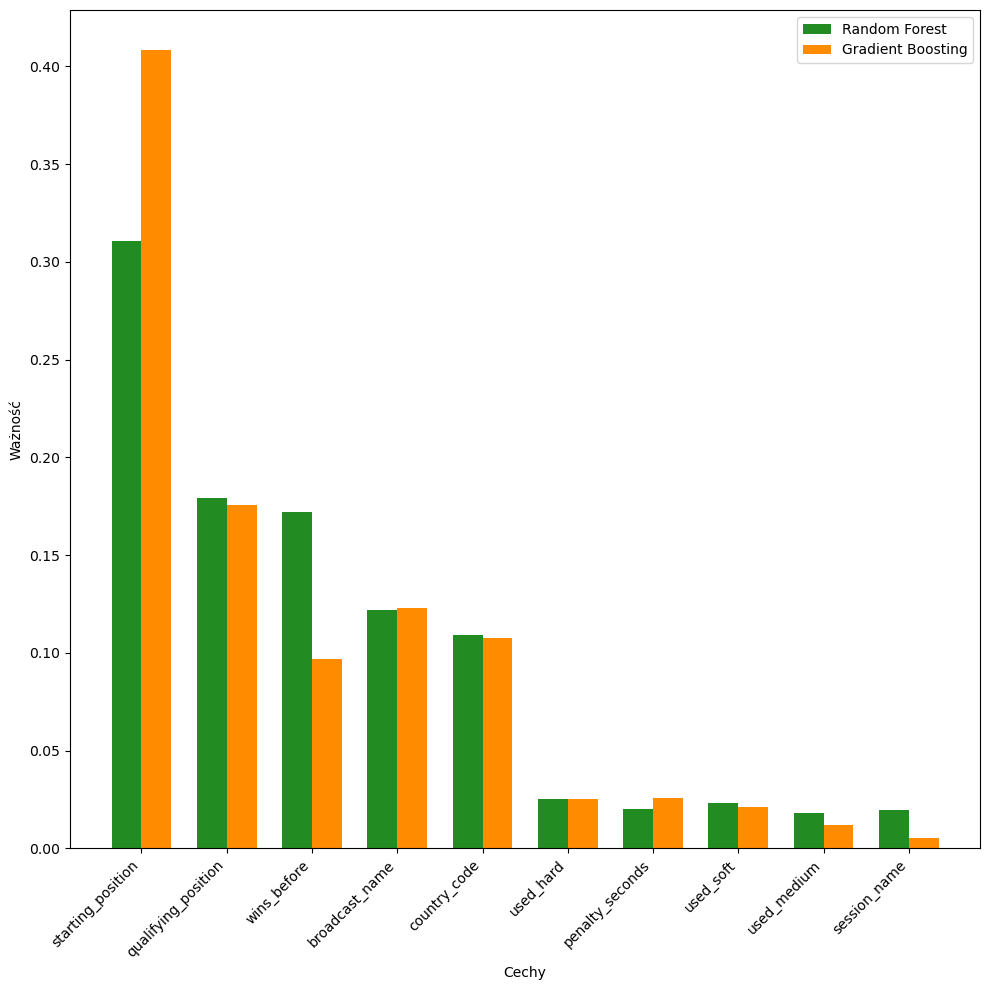


📈 Wszystkie cechy wraz z ich ważnościami:
               Feature  Random_Forest  Gradient_Boosting  Average
3    starting_position         0.3107             0.4084   0.3595
5  qualifying_position         0.1793             0.1756   0.1774
4          wins_before         0.1721             0.0967   0.1344
0       broadcast_name         0.1219             0.1228   0.1224
2         country_code         0.1091             0.1074   0.1082
8            used_hard         0.0252             0.0252   0.0252
9      penalty_seconds         0.0201             0.0256   0.0229
6            used_soft         0.0233             0.0213   0.0223
7          used_medium         0.0183             0.0120   0.0151
1         session_name         0.0199             0.0051   0.0125


In [103]:
feature_importance_100_f = show_feature_importance(study_selected_100, X_train_selected, y_train, X_train_selected.columns.tolist())